Index
1. Objective
2. Data Understanding
3. Exploratory Data Analysis (EDA)
    1. Descriptive Analysis of CustomerLifetimeValue
    2. Descriptive Analysis of Monthly Premium Auto(MPA)
    3. Descriptive Analysis ofTotalClaimAmount (TCA)
    4. Descriptive Analysis of other variables.
4. Inferential Statistics
    1. Effect of Insurance Coverage on Customer Life Time Value (CLV)
    2. Effect of Education on Customer Life Time Value (CLV)
    3. Effect of Employment Status on Customer Life Time Value (CLV)
    4. Effect of Gender on Customer Life Time Value (CLV)
    5. Effect of Location on Customer Life Time Value (CLV)
    6. Effect of Marital Status on Customer Life Time Value (CLV)
    7. Effect of Policy Type on Customer Life Time Value (CLV)
    8. Effect of Renew Offer Type on Customer Life Time Value (CLV)
    9. Effect of Sales Channel on Customer Life Time Value (CLV)
    10.Effect of Vehicle Class on Customer Life Time Value (CLV)
    11.Effect of Vehicle Size on Customer Life Time Value (CLV)
    12.Effect of States on Customer Life Time Value (CLV)
    13.Effect of Policy on Customer Life Time Value (CLV)
5. Regression Analysis with Continuous Variables
    1. Model Interpretation
    2. Residuals Analysis
6. Assumpation Testing of Linear Regression Analysis
    1. Detecting multicollinearity
    2. Detecting Homoscedasticity
    3. Detecting Autocorrelation
    4. Detecting MAPE
7. Removing Heteroskedasticity
8. Summary
9. Business Recommendation

# 1. Objective :-Analyzing the Impact of Various Factors on Customer Life-Time Value (CLV) in an Auto Insurance Company Dataset.

The lifetime value of a customer, or customer lifetime value (CLV), represents the total amount of money a
customer is expected to spend in business, or on products, during their lifetime. This is an important
figure to know because it helps company to make decisions about how much money to invest in
acquiring new customers and retaining existing ones.

Delving into the Influence of Various Factors on Customer Life-Time Value (CLV) in an Auto Insurance Company Dataset. 
This analysis aims to uncover the relationships between different variables and CLV, providing insights that 
can inform strategic decisions related to customer acquisition and retention efforts.


In [1]:
# Importing packages
library(tidyverse) 
library(car) 
library(zoo)
library(lmtest) 
library(dplyr) 
library(stringr)
library(corrplot)
library(ggplot2) 
library(timeDate)

-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.2 --
v ggplot2 3.4.0      v purrr   0.3.4 
v tibble  3.1.8      v dplyr   1.0.10
v tidyr   1.2.1      v stringr 1.4.1 
v readr   2.1.3      v forcats 0.5.2 
-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Loading required package: carData


Attaching package: 'car'


The following object is masked from 'package:dplyr':

    recode


The following object is masked from 'package:purrr':

    some



Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


corrplot 0.92 loaded



In [2]:
# Reproduce the same results always
set.seed(123) 


In [3]:
# Reading in the data file
InsuranceData <- read.csv("Insurance CLV Database.csv")
view(InsuranceData)
head(InsuranceData) # Checking top 6 observations of dataset
tail(InsuranceData) # Checking bottom 6 observations of dataset

# Specify the variables of interest
variables_of_interest <- c("Customer.Lifetime.Value", "Income", "Monthly.Premium.Auto",
                            "Months.Since.Last.Claim", "Months.Since.Policy.Inception",
                            "Number.of.Open.Complaints", "Number.of.Policies", "Total.Claim.Amount")

# Calculate summary statistics
summary_stats <- summary(InsuranceData[variables_of_interest])

std_dev <- sapply(InsuranceData[variables_of_interest], sd)

# Calculate range (min, max)
range_stats <- data.frame(
  variable = variables_of_interest,
  min = sapply(InsuranceData[variables_of_interest], min),
  max = sapply(InsuranceData[variables_of_interest], max),
  sd = std_dev
)

# Display the results
print("Summary Statistics:")
print(summary_stats)

print("\nRange Statistics:")
print(range_stats)

# Calculate counts and percentages for "Response"
response_counts <- table(InsuranceData$Response)
response_percentages <- prop.table(response_counts) * 100

# Calculate counts and percentages for "Coverage"
coverage_counts <- table(InsuranceData$Coverage)
coverage_percentages <- prop.table(coverage_counts) * 100

# Calculate counts and percentages for "Education"
education_counts <- table(InsuranceData$Education)
education_percentages <- prop.table(education_counts) * 100

# Calculate counts and percentages for "Vehicle.Class"
vehicle_class_counts <- table(InsuranceData$Vehicle.Class)
vehicle_class_percentages <- prop.table(vehicle_class_counts) * 100

# Display the results
print("Response:")
print(data.frame(Response = names(response_counts), Count = as.numeric(response_counts), Percentage = response_percentages))

print("\nCoverage:")
print(data.frame(Coverage = names(coverage_counts), Count = as.numeric(coverage_counts), Percentage = coverage_percentages))

print("\nEducation:")
print(data.frame(Education = names(education_counts), Count = as.numeric(education_counts), Percentage = education_percentages))

print("\nVehicle Class:")
print(data.frame(Vehicle_Class = names(vehicle_class_counts), Count = as.numeric(vehicle_class_counts), Percentage = vehicle_class_percentages))



,Customer,State,Customer.Lifetime.Value,Response,Coverage,Education,Effective.To.Date,EmploymentStatus,Gender,Income,...,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Policy.Type,Policy,Renew.Offer.Type,Sales.Channel,Total.Claim.Amount,Vehicle.Class,Vehicle.Size
,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,...,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>
1,BU79786,Washington,2763.519,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.8111,Two-Door Car,Medsize
2,QZ44356,Arizona,6979.536,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.4649,Four-Door Car,Medsize
3,AI49188,Nevada,12887.432,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.4722,Two-Door Car,Medsize
4,WW63253,California,7645.862,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.8813,SUV,Medsize
5,HB64268,Washington,2813.693,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.1309,Four-Door Car,Medsize
6,OC83172,Oregon,8256.298,Yes,Basic,Bachelor,1/25/11,Employed,F,62902,...,94,0,2,Personal Auto,Personal L3,Offer2,Web,159.3830,Two-Door Car,Medsize


,Customer,State,Customer.Lifetime.Value,Response,Coverage,Education,Effective.To.Date,EmploymentStatus,Gender,Income,...,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Policy.Type,Policy,Renew.Offer.Type,Sales.Channel,Total.Claim.Amount,Vehicle.Class,Vehicle.Size
,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,...,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>
9129,YM19146,California,4100.399,No,Premium,College,1/6/11,Employed,F,47761,...,58,0,1,Personal Auto,Personal L2,Offer1,Branch,541.2820,Four-Door Car,Large
9130,LA72316,California,23405.988,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.2348,Four-Door Car,Medsize
9131,PK87824,California,3096.511,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.2000,Four-Door Car,Medsize
9132,TD14365,California,8163.890,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.7850,Four-Door Car,Medsize
9133,UP19263,California,7524.442,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.2000,Four-Door Car,Large
9134,Y167826,California,2611.837,No,Extended,College,2/14/11,Unemployed,M,0,...,90,0,1,Corporate Auto,Corporate L3,Offer4,Call Center,369.6000,Two-Door Car,Medsize


[1] "Summary Statistics:"
 Customer.Lifetime.Value     Income      Monthly.Premium.Auto
 Min.   : 1898           Min.   :    0   Min.   : 61.00      
 1st Qu.: 3994           1st Qu.:    0   1st Qu.: 68.00      
 Median : 5780           Median :33890   Median : 83.00      
 Mean   : 8005           Mean   :37657   Mean   : 93.22      
 3rd Qu.: 8962           3rd Qu.:62320   3rd Qu.:109.00      
 Max.   :83325           Max.   :99981   Max.   :298.00      
 Months.Since.Last.Claim Months.Since.Policy.Inception
 Min.   : 0.0            Min.   : 0.00                
 1st Qu.: 6.0            1st Qu.:24.00                
 Median :14.0            Median :48.00                
 Mean   :15.1            Mean   :48.06                
 3rd Qu.:23.0            3rd Qu.:71.00                
 Max.   :35.0            Max.   :99.00                
 Number.of.Open.Complaints Number.of.Policies Total.Claim.Amount
 Min.   :0.0000            Min.   :1.000      Min.   :   0.099  
 1st Qu.:0.0000          

# 2. Data Understanding

In [4]:
# Remove Customer ID from data set.
InsuranceData <- InsuranceData[,-c(1)] 


In [5]:
#Cleaning the data
colnames(InsuranceData)
colnames(InsuranceData) <- str_replace_all(colnames(InsuranceData),"[.]","")
colnames(InsuranceData)

[1] "State"                         "Customer.Lifetime.Value"      
 [3] "Response"                      "Coverage"                     
 [5] "Education"                     "Effective.To.Date"            
 [7] "EmploymentStatus"              "Gender"                       
 [9] "Income"                        "Location.Code"                
[11] "Marital.Status"                "Monthly.Premium.Auto"         
[13] "Months.Since.Last.Claim"       "Months.Since.Policy.Inception"
[15] "Number.of.Open.Complaints"     "Number.of.Policies"           
[17] "Policy.Type"                   "Policy"                       
[19] "Renew.Offer.Type"              "Sales.Channel"                
[21] "Total.Claim.Amount"            "Vehicle.Class"                
[23] "Vehicle.Size"

[1] "State"                      "CustomerLifetimeValue"     
 [3] "Response"                   "Coverage"                  
 [5] "Education"                  "EffectiveToDate"           
 [7] "EmploymentStatus"           "Gender"                    
 [9] "Income"                     "LocationCode"              
[11] "MaritalStatus"              "MonthlyPremiumAuto"        
[13] "MonthsSinceLastClaim"       "MonthsSincePolicyInception"
[15] "NumberofOpenComplaints"     "NumberofPolicies"          
[17] "PolicyType"                 "Policy"                    
[19] "RenewOfferType"             "SalesChannel"              
[21] "TotalClaimAmount"           "VehicleClass"              
[23] "VehicleSize"

In [6]:
# Data Understanding
dim(InsuranceData)
str(InsuranceData)


[1] 9134   23

'data.frame':	9134 obs. of  23 variables:
 $ State                     : chr  "Washington" "Arizona" "Nevada" "California" ...
 $ CustomerLifetimeValue     : num  2764 6980 12887 7646 2814 ...
 $ Response                  : chr  "No" "No" "No" "No" ...
 $ Coverage                  : chr  "Basic" "Extended" "Premium" "Basic" ...
 $ Education                 : chr  "Bachelor" "Bachelor" "Bachelor" "Bachelor" ...
 $ EffectiveToDate           : chr  "2/24/11" "1/31/11" "2/19/11" "1/20/11" ...
 $ EmploymentStatus          : chr  "Employed" "Unemployed" "Employed" "Unemployed" ...
 $ Gender                    : chr  "F" "F" "F" "M" ...
 $ Income                    : int  56274 0 48767 0 43836 62902 55350 0 14072 28812 ...
 $ LocationCode              : chr  "Suburban" "Suburban" "Suburban" "Suburban" ...
 $ MaritalStatus             : chr  "Married" "Single" "Married" "Married" ...
 $ MonthlyPremiumAuto        : int  69 94 108 106 73 69 67 101 71 93 ...
 $ MonthsSinceLastClaim      : int  32

**The provided dataset has lots of details :**
1. There are 9134 Observations of 24 Variable
2. There are mix of categorical and continous DataType.
3. Dependent Variable is Customer Life Time Value as we have to predict the CLV.
4. Independent Variables are: Customer, StateCustomerLifetimeValue, Response, Coverage,
Education, EffectiveToDate, EmploymentStatus, Gender, Income, LocationCode, MaritalStatus,
MonthlyPremiumAuto, MonthsSinceLastClaim, MonthsSincePolicyInception,
NumberofOpenComplaints, NumberofPoliciesPolicyType, Policy, RenewOfferType,
SalesChannel, TotalClaimAmountVehicleClass, VehicleSize
5. Continues Independed Variables are : CustomerLifetimeValue, Income,MonthlyPremiumAuto,
MonthsSinceLastClaim, MonthsSincePolicyInception, NumberofOpenComplaints,
NumberofPolicies, TotalClaimAmount
6. There are no null values, so no further action required to replace missing or null values.
7. “Customer” column is serial number so it is insignificat for analysis and removed from the
dataset.

In [7]:
# Checking null values in each column and storing the value in a data frame na_counts
na_counts <- sapply(InsuranceData, function(y) sum(is.na(y)))
na_counts <- data.frame(na_counts)
na_counts

,na_counts
,<int>
State,0
CustomerLifetimeValue,0
Response,0
Coverage,0
Education,0
EffectiveToDate,0
EmploymentStatus,0
Gender,0
Income,0


There are no null values, so no further action required to replace missing or null values.

In [8]:
# Unique Values of each column
sapply(InsuranceData, data.table::uniqueN)

State      CustomerLifetimeValue 
                         5                       8041 
                  Response                   Coverage 
                         2                          3 
                 Education            EffectiveToDate 
                         5                         59 
          EmploymentStatus                     Gender 
                         5                          2 
                    Income               LocationCode 
                      5694                          3 
             MaritalStatus         MonthlyPremiumAuto 
                         3                        202 
      MonthsSinceLastClaim MonthsSincePolicyInception 
                        36                        100 
    NumberofOpenComplaints           NumberofPolicies 
                         6                          9 
                PolicyType                     Policy 
                         3                          9 
            RenewOfferType               SalesChannel 
                         4                          4 
          TotalClaimAmount               VehicleClass 
                      5106                          6 
               VehicleSize 
                         3

# 3. Exploratory Data Analysis (EDA)

In this section we perform initial investigations on insurance data so as to discover patterns and to
check assumptions with the help of summary statistics and graphical representations.

**3.1. Descriptive Analysis of CustomerLifetimeValue**


[1]  1898.008 83325.381

[1] 8004.94

[1] 6870.968

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1898    3994    5780    8005    8962   83325 

[1] 47210196

[1] 3.031284
attr(,"method")
[1] "moment"

[1] 13.81163
attr(,"method")
[1] "excess"

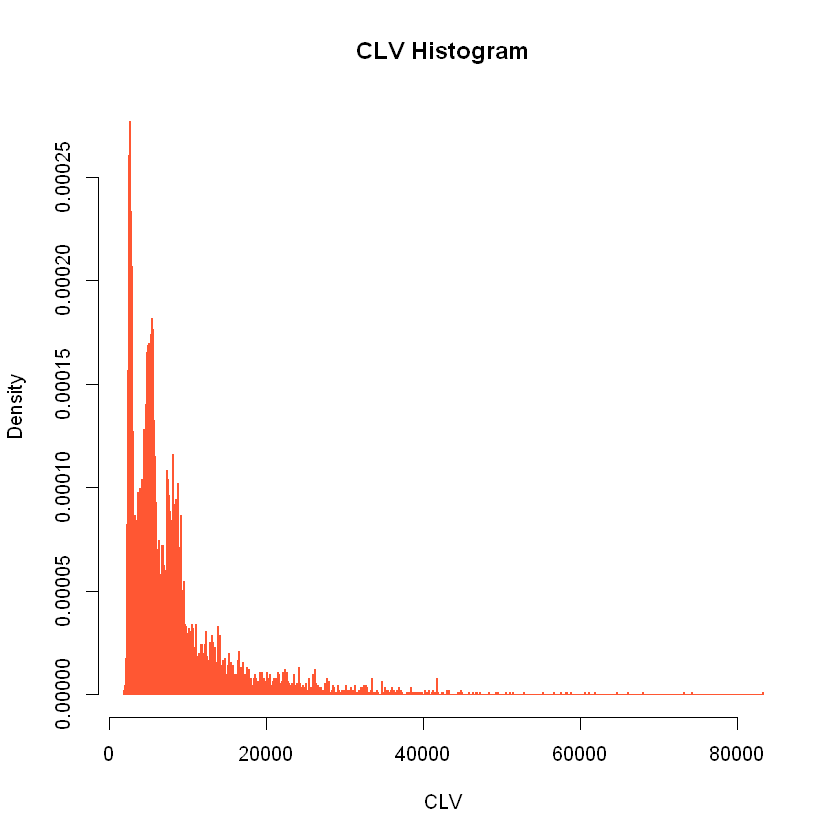

In [9]:
range(InsuranceData$CustomerLifetimeValue)
mean(InsuranceData$CustomerLifetimeValue)
sd(InsuranceData$CustomerLifetimeValue)
summary(InsuranceData$CustomerLifetimeValue)

var(InsuranceData$CustomerLifetimeValue)
skewness(InsuranceData$CustomerLifetimeValue)
kurtosis(InsuranceData$CustomerLifetimeValue) 

#hist(InsuranceData$CustomerLifetimeValue, col = "#FF5733", xlab = "CLV")
hist(InsuranceData$CustomerLifetimeValue, breaks = (max(InsuranceData$CustomerLifetimeValue) - min(InsuranceData$CustomerLifetimeValue))/100, freq = FALSE, main = "CLV Histogram", xlab = "CLV", border = "#FF5733")


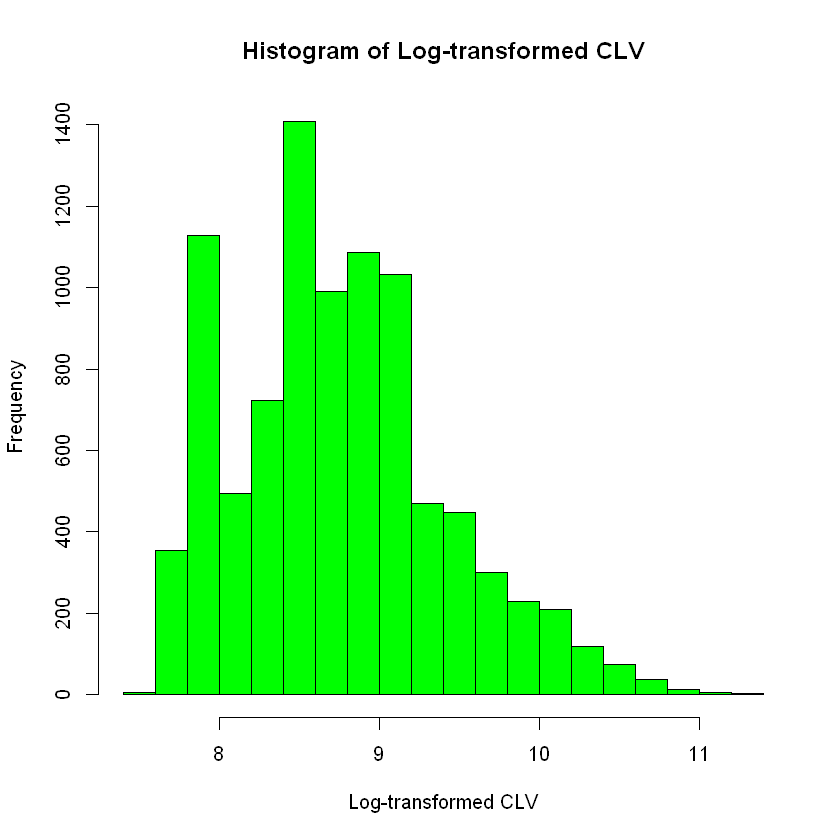

In [50]:
log_clv <- log(InsuranceData$CustomerLifetimeValue)


hist(log_clv, col = "green", main = "Histogram of Log-transformed CLV", xlab = "Log-transformed CLV")


1. Maximum CLV is $83325.381 and the minimum CLV is $1898.008.
1. Mean of CLV is $8005  and the Median is  $5780.
1. The Variance in CLV is 47210196 and the Standard Deviation is 6870.968.
1. Skewness is 4.031284. CLV is positive skewed and most values are concentrated on the left of
1. the mean value, yet all the extreme values are on the right of the mean value.
1. Kurtosis is 13.81163. Since kurtosis > 3, means distribution has thicker tails than normal
1. distribution and have more outliers (extreme values).
1. This means that the distribution of CLV is positively skewed (as expected) and is heavily
1. Leptokurtic.
1. These results indicate a distribution that is heavily skewed with a very large tail.
1. There are a LOT of Customers with low CLV. Very few customers with high CLV.
1. This can be visually understood using the Histogram.

**3.2. Descriptive Analysis of Monthly Premium Auto(MPA)**

[1]  61 298

[1] 93.21929

[1] 34.40797

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  61.00   68.00   83.00   93.22  109.00  298.00 

[1] 1183.908

[1] 2.122849
attr(,"method")
[1] "moment"

[1] 6.187546
attr(,"method")
[1] "excess"

[1] 0.3962617

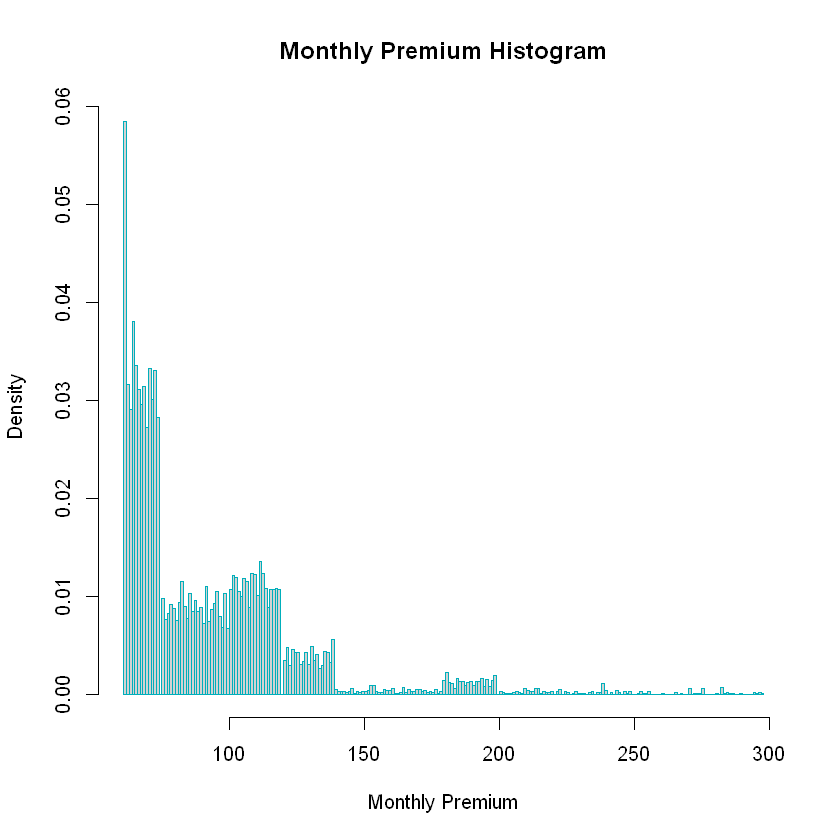

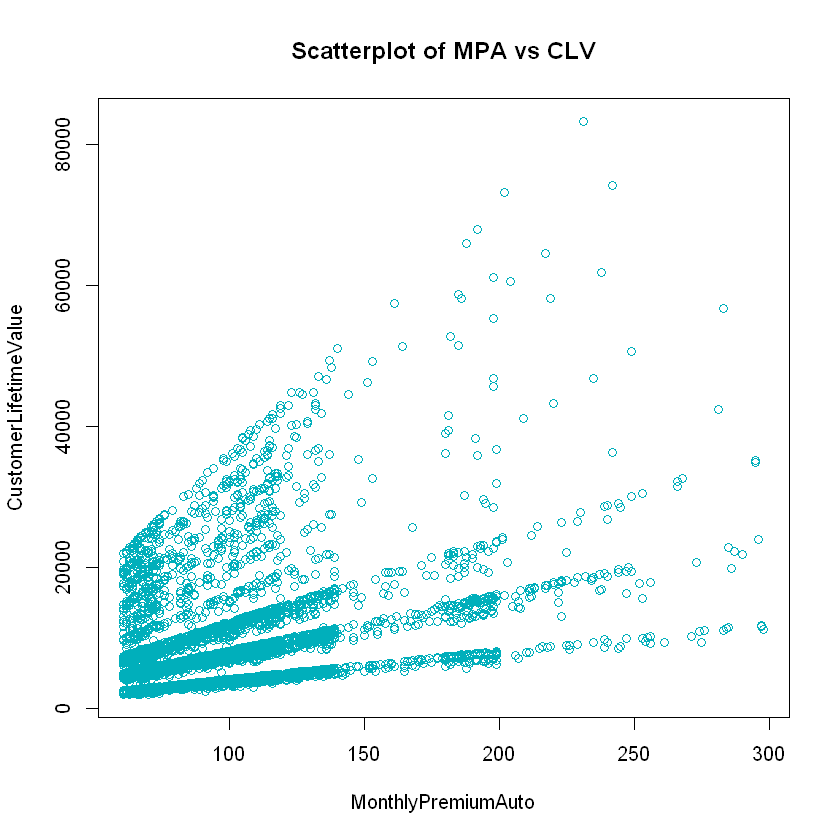

In [10]:
range(InsuranceData$MonthlyPremiumAuto)
mean(InsuranceData$MonthlyPremiumAuto)
sd(InsuranceData$MonthlyPremiumAuto)
summary(InsuranceData$MonthlyPremiumAuto)
var(InsuranceData$MonthlyPremiumAuto)
skewness(InsuranceData$MonthlyPremiumAuto)
kurtosis(InsuranceData$MonthlyPremiumAuto)
cor(InsuranceData$MonthlyPremiumAuto,InsuranceData$CustomerLifetimeValue)

#hist(InsuranceData$MonthlyPremiumAuto, col = "#00AFBB", xlab = "Monthly Premium Auto")
hist(InsuranceData$MonthlyPremiumAuto, breaks = (max(InsuranceData$MonthlyPremiumAuto) - min(InsuranceData$MonthlyPremiumAuto))/1, freq = FALSE, main = "Monthly Premium Histogram", xlab = "Monthly Premium", border = "#00AFBB")

plot(x=InsuranceData$MonthlyPremiumAuto, y=InsuranceData$CustomerLifetimeValue, col="#00AFBB", cex=1, xlab="MonthlyPremiumAuto", ylab="CustomerLifetimeValue",
       main="Scatterplot of MPA vs CLV")


1. Maximum MPA is 298 and the minimum MPA is 61
1. Mean of MPA is 93.21929 and the Median is 84.00
1. The Variance in MPA is 1183.908 and the Standard Deviation is 34.40797
1. Skewness is 2.122849. MPA is positive skewed and most values are concentrated on the left of
1. the mean value, yet all the extreme values are on the right of the mean value.
1. Kurtosis is 6.187546. Since kurtosis > 3, means distribution has thicker tails than normal
1. distribution and have more outliers (extreme values).
1. There is a Positive Corelation of 39.62 % of MPA with CLV. From scatter plot, it is clearly
1. visible that on MPA, CLV is also Increasing.7.
1. Monthly premiums follow a trend similar to CLV although the distribution is NOT as skewed
1. or as long tailed as CLV. This can be visually seen in the Histogram.

**3.3. Descriptive Analysis ofTotalClaimAmount (TCA)**

[1]    0.099007 2893.239678

[1] 434.0888

[1] 290.5001

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
   0.099  272.258  383.945  434.089  547.515 2893.240 

[1] 84390.3

[1] 1.714403
attr(,"method")
[1] "moment"

[1] 5.973506
attr(,"method")
[1] "excess"

[1] 0.2264509

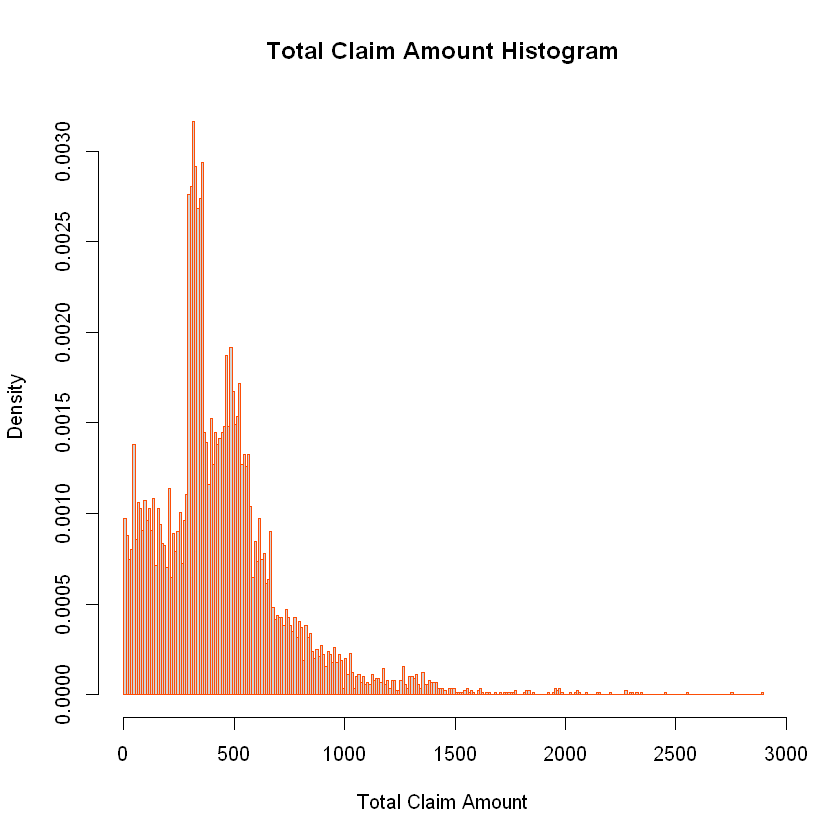

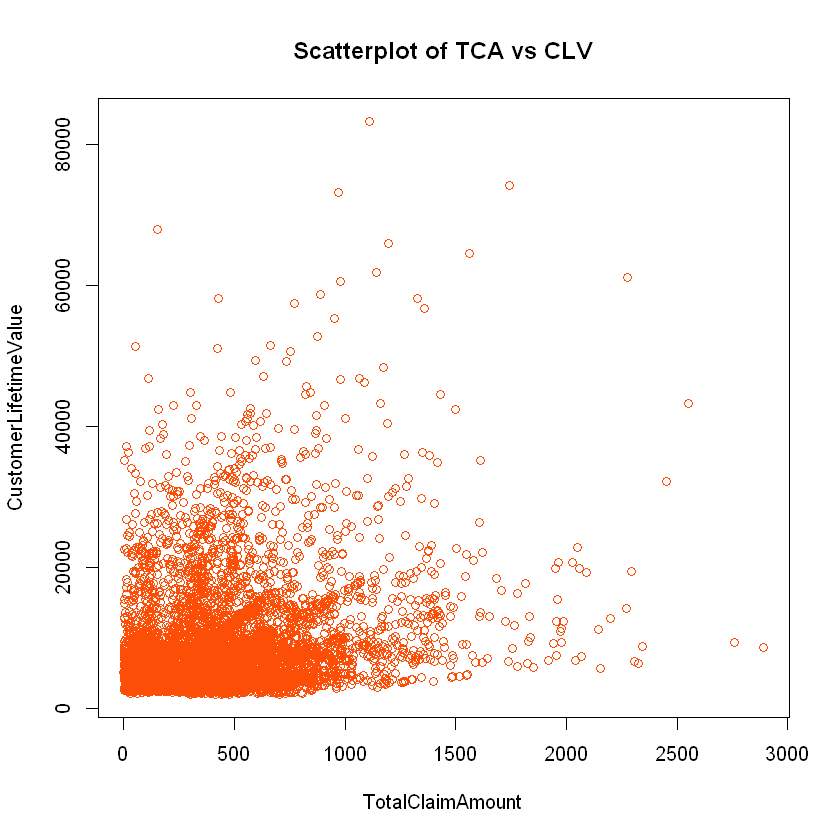

In [11]:
range(InsuranceData$TotalClaimAmount)
mean(InsuranceData$TotalClaimAmount)
sd(InsuranceData$TotalClaimAmount)
summary(InsuranceData$TotalClaimAmount)
var(InsuranceData$TotalClaimAmount)
skewness(InsuranceData$TotalClaimAmount)
kurtosis(InsuranceData$TotalClaimAmount) 
cor(InsuranceData$TotalClaimAmount,InsuranceData$CustomerLifetimeValue)

#hist(InsuranceData$TotalClaimAmount, col = "#FC4E07", xlab = "Total Claim Amount")
hist(InsuranceData$TotalClaimAmount, breaks = (max(InsuranceData$TotalClaimAmount) - min(InsuranceData$TotalClaimAmount))/10, freq = FALSE, main = "Total Claim Amount Histogram", xlab = "Total Claim Amount", border = "#FC4E07")

plot(x=InsuranceData$TotalClaimAmount, y=InsuranceData$CustomerLifetimeValue, col="#FC4E07", cex=1, xlab="TotalClaimAmount", ylab="CustomerLifetimeValue",
     main="Scatterplot of TCA vs CLV")


1. Minimum TCA is $0.099007 and the maximum TCA is $2893.239678
1. Mean of TCA is $434.0888 and the Median is $383.945
1. The Variance in TCA is 84390.3 and the Standard Deviation is 290.5001
1. Skewness is 1.714403. TCA is positive skewed and most values are concentrated on the left of
1. the mean value, yet all the extreme values are on the right of the mean value.
1. Kurtosis is 5.973506. Since kurtosis > 3, means TCA distribution has thicker tails than normal
1. distribution and have more outliers (extreme values).
1. There is a Positive Corelation of 22.65 % of TCA with CLV. From scatter plot, it is clearly
1. visible that on TCA, CLV is also Increasing.
1. Total Claim amounts also follow a trend similar to CLV and MPA although the distribution is
1. NOT as skewed or as long tailed as MPA. This can be visually seen in the Histogram.

**This means that variation in data is CLV > MPA > TCA**

**3.4 Descriptive Analysis of other variables:**

[1] 0.02436566

[1] 0.01151668

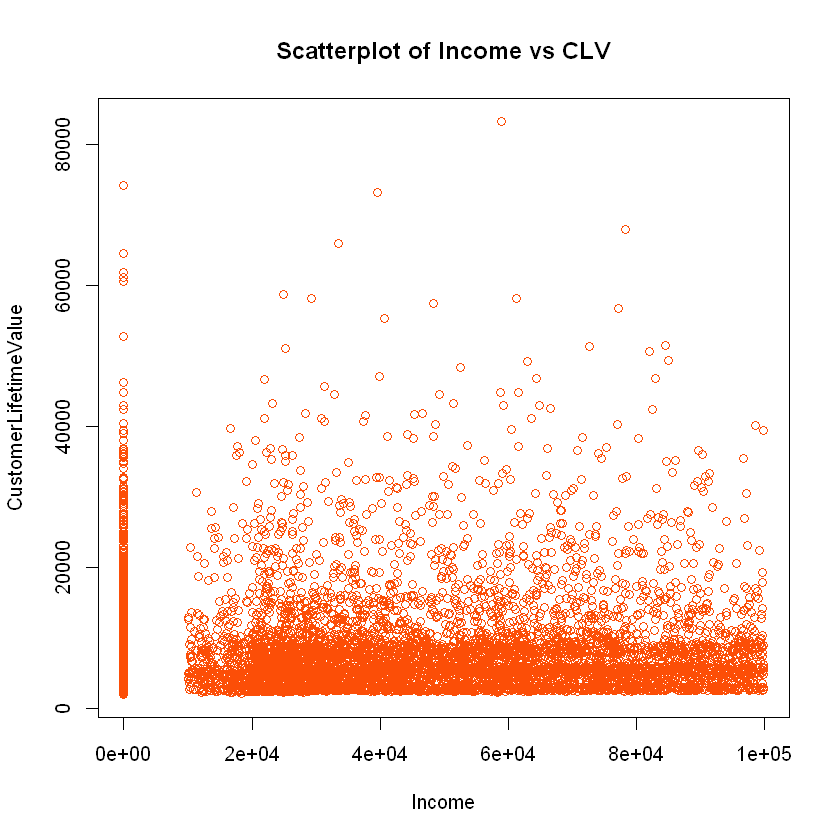

[1] 0.009418381

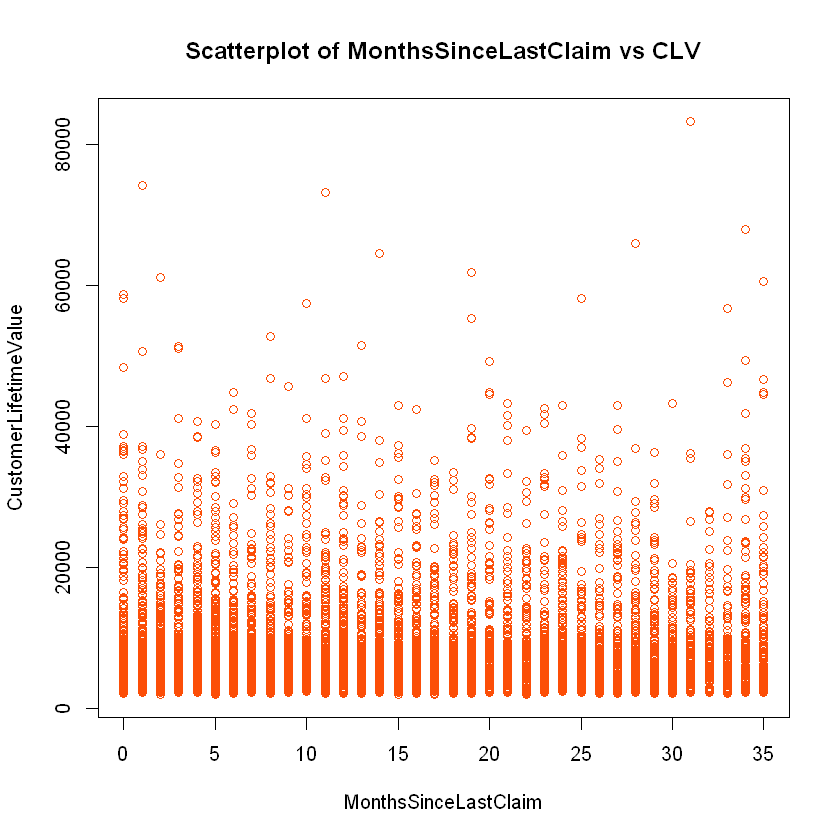

[1] -0.03634319

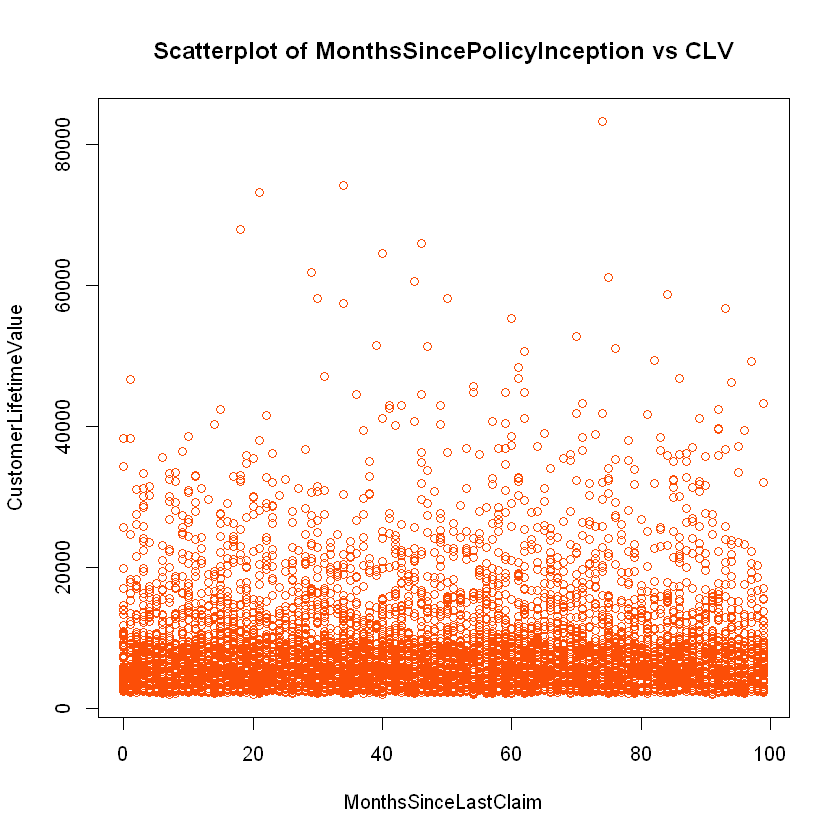

[1] 0.02195536

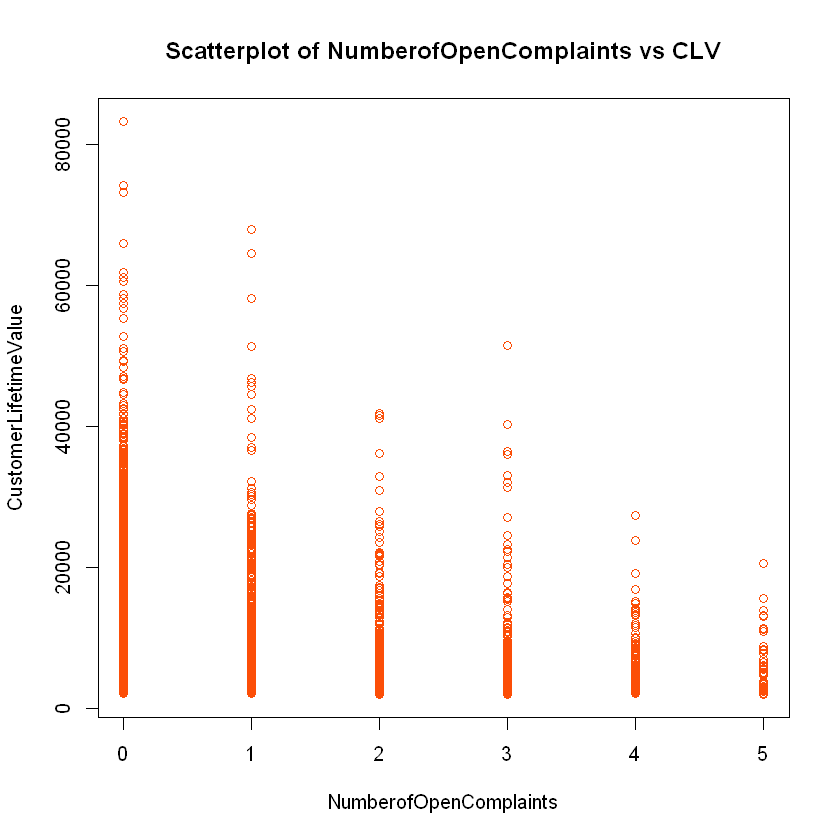

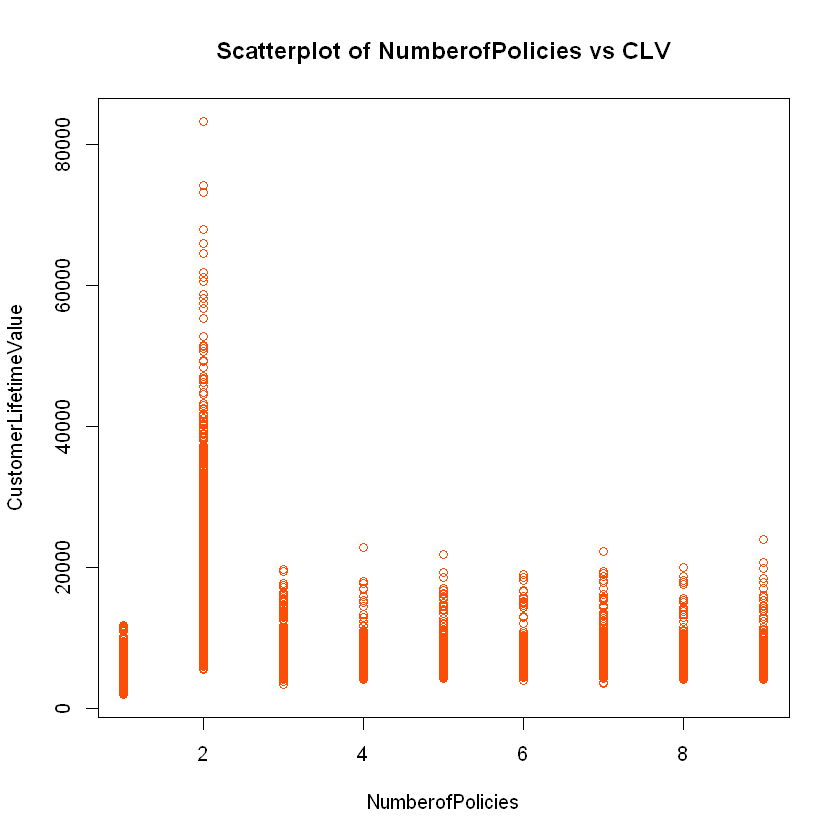

In [12]:
cor(InsuranceData$Income,InsuranceData$CustomerLifetimeValue)
plot(x=InsuranceData$Income, y=InsuranceData$CustomerLifetimeValue, col="#FC4E07", cex=1, xlab="Income", ylab="CustomerLifetimeValue",main="Scatterplot of Income vs CLV")

cor(InsuranceData$MonthsSinceLastClaim,InsuranceData$CustomerLifetimeValue)
plot(x=InsuranceData$MonthsSinceLastClaim, y=InsuranceData$CustomerLifetimeValue, col="#FC4E07", cex=1, xlab="MonthsSinceLastClaim", ylab="CustomerLifetimeValue",main="Scatterplot of MonthsSinceLastClaim vs CLV")

cor(InsuranceData$MonthsSincePolicyInception,InsuranceData$CustomerLifetimeValue)
plot(x=InsuranceData$MonthsSincePolicyInception, y=InsuranceData$CustomerLifetimeValue, col="#FC4E07", cex=1, xlab="MonthsSinceLastClaim", ylab="CustomerLifetimeValue",main="Scatterplot of MonthsSincePolicyInception vs CLV")

cor(InsuranceData$NumberofOpenComplaints,InsuranceData$CustomerLifetimeValue)
plot(x=InsuranceData$NumberofOpenComplaints, y=InsuranceData$CustomerLifetimeValue, col="#FC4E07", cex=1, xlab="NumberofOpenComplaints", ylab="CustomerLifetimeValue",main="Scatterplot of NumberofOpenComplaints vs CLV")

cor(InsuranceData$NumberofPolicies,InsuranceData$CustomerLifetimeValue)
plot(x=InsuranceData$NumberofPolicies, y=InsuranceData$CustomerLifetimeValue, col="#FC4E07", cex=1, xlab="NumberofPolicies", ylab="CustomerLifetimeValue",main="Scatterplot of NumberofPolicies vs CLV")



**The positive correlation values close to zero show that that there is no strong relationship of Income, MonthsSinceLastClaim, NumberofPolicies etc with CLV.
**

* # 4. Inferential Statistics

The most obvious candidate for Dependent Variable is CLV (CustomerLifetimeValue).
This also makes sense from a Business Perspective as we want to understand what contributes to
making a high value customer (Descriptive analysis) and maybe later on predict who is going to be
high value customer (Predictive analysis)

**4.01 Effect of Insurance Coverage on Customer Life Time Value (CLV)**


Coverage,x
<chr>,<dbl>
Basic,40037853
Extended,24101296
Premium,8977977


Warning message:
"`stat(aggData$x)` was deprecated in ggplot2 3.4.0.
i Please use `after_stat(aggData$x)` instead."


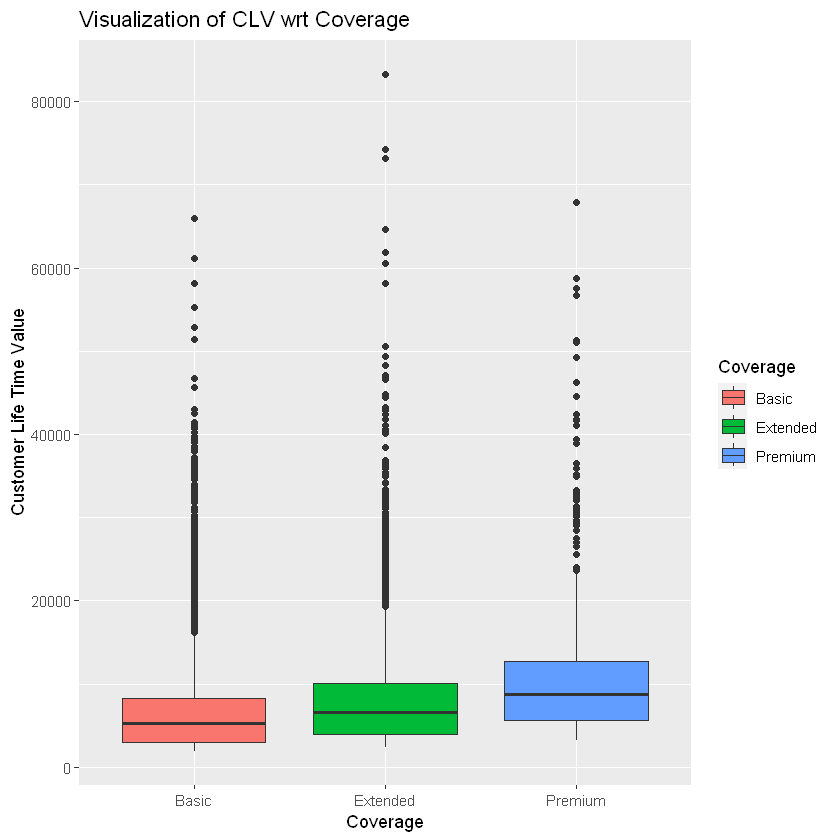

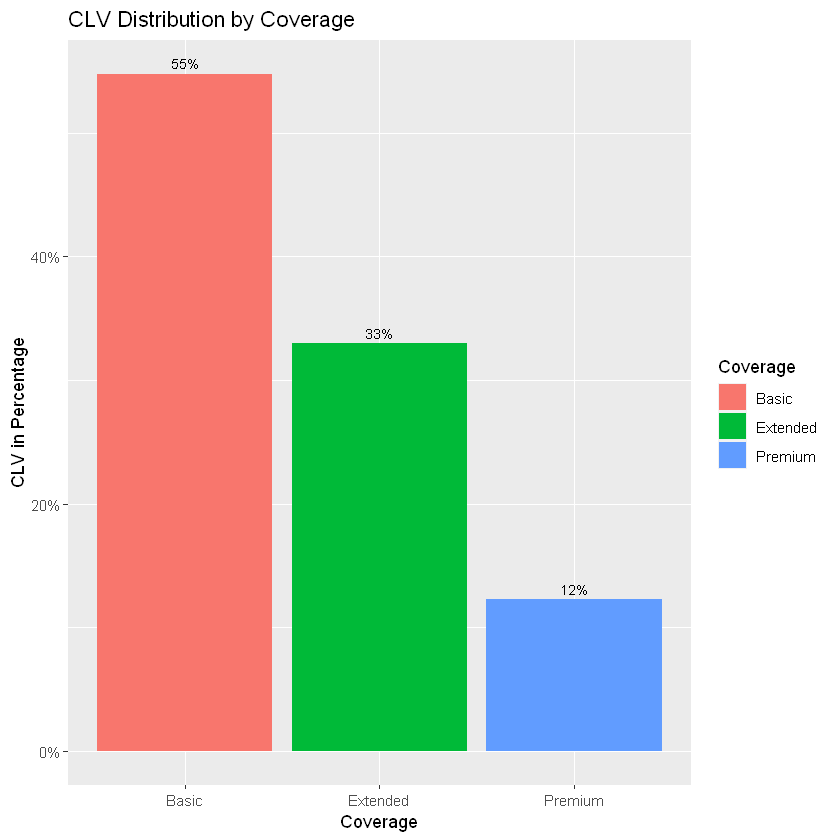

In [13]:
ggplot(InsuranceData, aes(x=Coverage, y= CustomerLifetimeValue, fill = Coverage)) + 
  geom_boxplot() + 
  labs(x="Coverage",y = "Customer Life Time Value", fill="Coverage") + 
  ggtitle("Visualization of CLV wrt Coverage")

aggData <- aggregate(x = InsuranceData$CustomerLifetimeValue, by=list(Coverage = InsuranceData$Coverage), FUN = sum)
aggData
ggplot(data = aggData, aes(x = Coverage, y = prop.table(stat(aggData$x)), fill = Coverage, label = scales::percent(prop.table(stat(aggData$x))))) +
  geom_bar(stat="identity", position = "dodge") + 
  geom_text(stat = 'identity', position = position_dodge(.9),  vjust = -0.5, size = 3) + 
  scale_y_continuous(labels = scales::percent) + 
  labs(x = 'Coverage', y = 'CLV in Percentage', fill = 'Coverage') + 
  ggtitle("CLV Distribution by Coverage")


Customers who have taken Basic Insurance for their vehicals are more valuable then Extended or
Premium Insurance Policy holders.

**4.02 Effect of Education on Customer Life Time Value (CLV)**

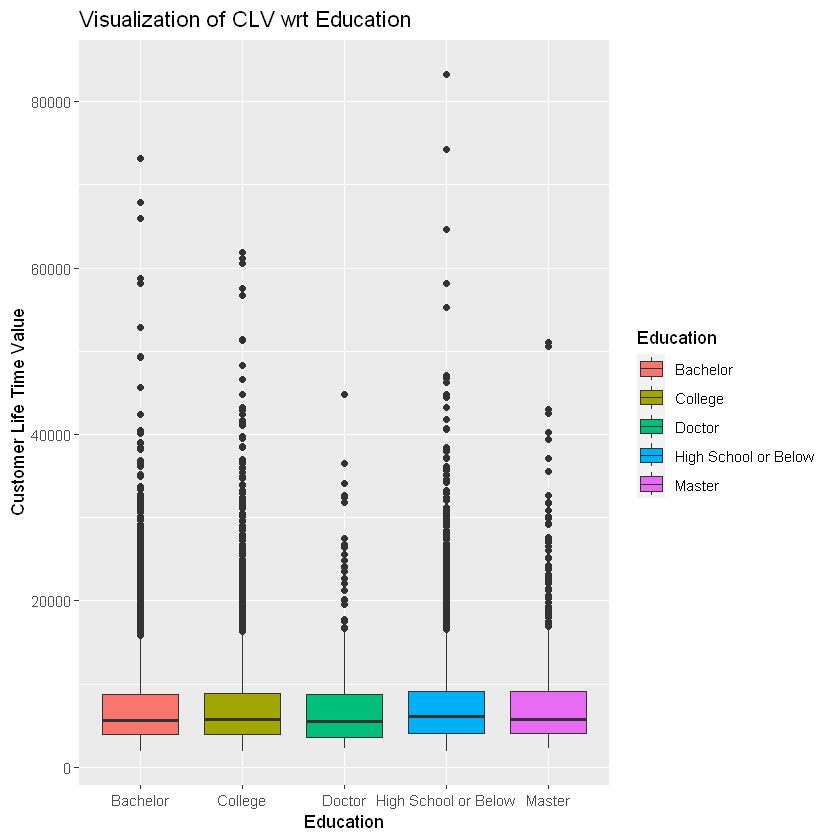

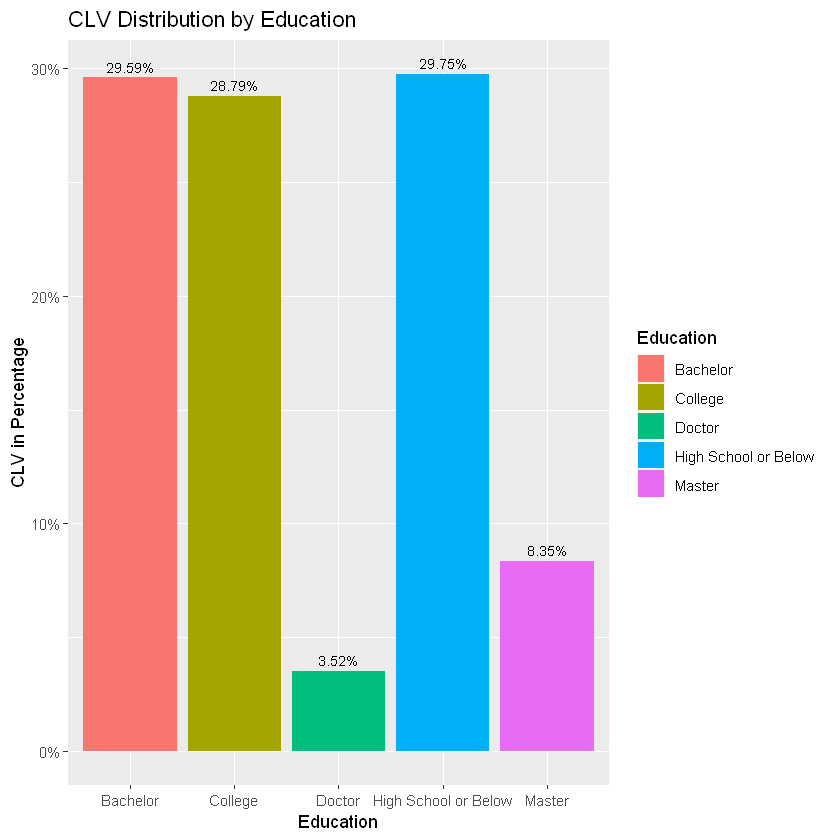

In [14]:
ggplot(InsuranceData, aes(x=Education, y= CustomerLifetimeValue, fill = Education)) + 
  geom_boxplot() + 
  labs(x="Education",y = "Customer Life Time Value", fill="Education") + 
  ggtitle("Visualization of CLV wrt Education")

aggData <- aggregate(x = InsuranceData$CustomerLifetimeValue, by=list(Education = InsuranceData$Education), FUN = sum)

ggplot(data = aggData, aes(x = Education, y = prop.table(stat(aggData$x)), fill = Education, label = scales::percent(prop.table(stat(aggData$x))))) +
  geom_bar(stat="identity", position = "dodge") + 
  geom_text(stat = 'identity', position = position_dodge(.9),  vjust = -0.5, size = 3) + 
  scale_y_continuous(labels = scales::percent) + 
  labs(x = 'Education', y = 'CLV in Percentage', fill = 'Education') + 
  ggtitle("CLV Distribution by Education")



Educated customers (with a bachelors or equivalent degree) are more valuable than others.

**4.03 Effect of Employment Status on Customer Life Time Value (CLV)**

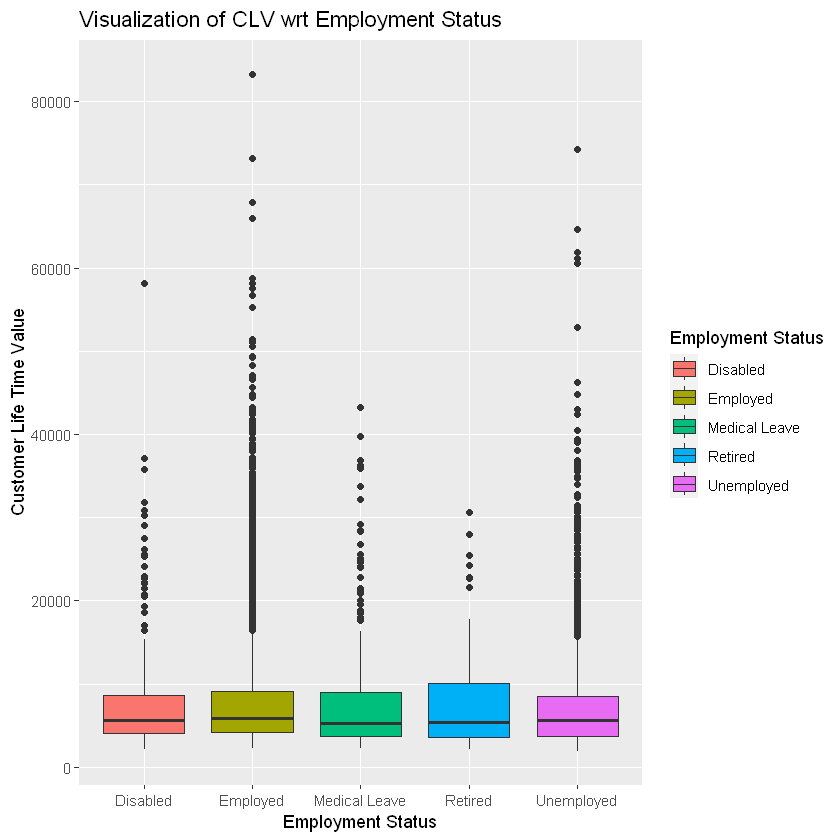

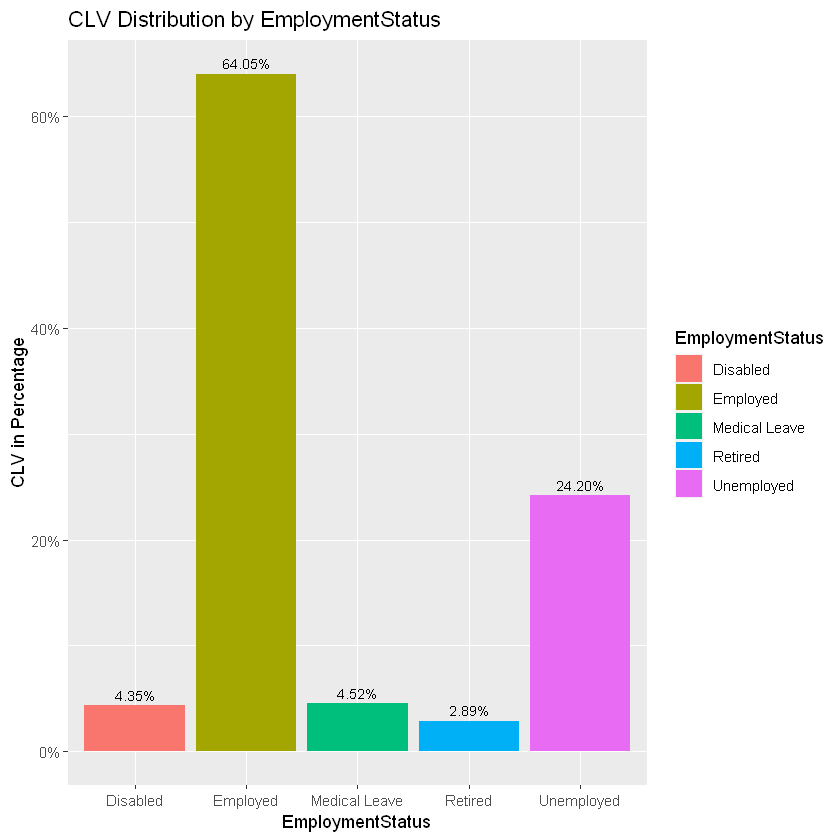

In [15]:
ggplot(InsuranceData, aes(x=EmploymentStatus, y= CustomerLifetimeValue, fill = EmploymentStatus)) + 
  geom_boxplot() + 
  labs(x="Employment Status",y = "Customer Life Time Value", fill="Employment Status") + 
  ggtitle("Visualization of CLV wrt Employment Status")

aggData <- aggregate(x = InsuranceData$CustomerLifetimeValue, by=list(EmploymentStatus = InsuranceData$EmploymentStatus), FUN = sum)

ggplot(data = aggData, aes(x = EmploymentStatus, y = prop.table(stat(aggData$x)), fill = EmploymentStatus, label = scales::percent(prop.table(stat(aggData$x))))) +
  geom_bar(stat="identity", position = "dodge") + 
  geom_text(stat = 'identity', position = position_dodge(.9),  vjust = -0.5, size = 3) + 
  scale_y_continuous(labels = scales::percent) + 
  labs(x = 'EmploymentStatus', y = 'CLV in Percentage', fill = 'EmploymentStatus') + 
  ggtitle("CLV Distribution by EmploymentStatus")

Employed customers are more valuable than others as compared to Retired, Unemployed or Disabled
Customers.

**4.04 Effect of Gender on Customer Life Time Value (CLV)**

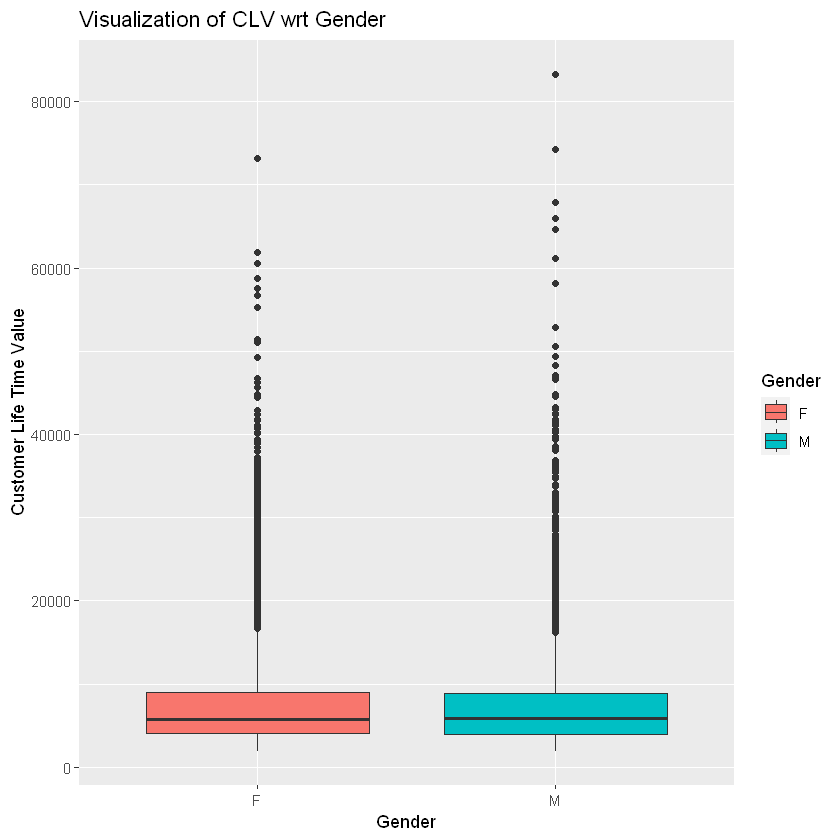

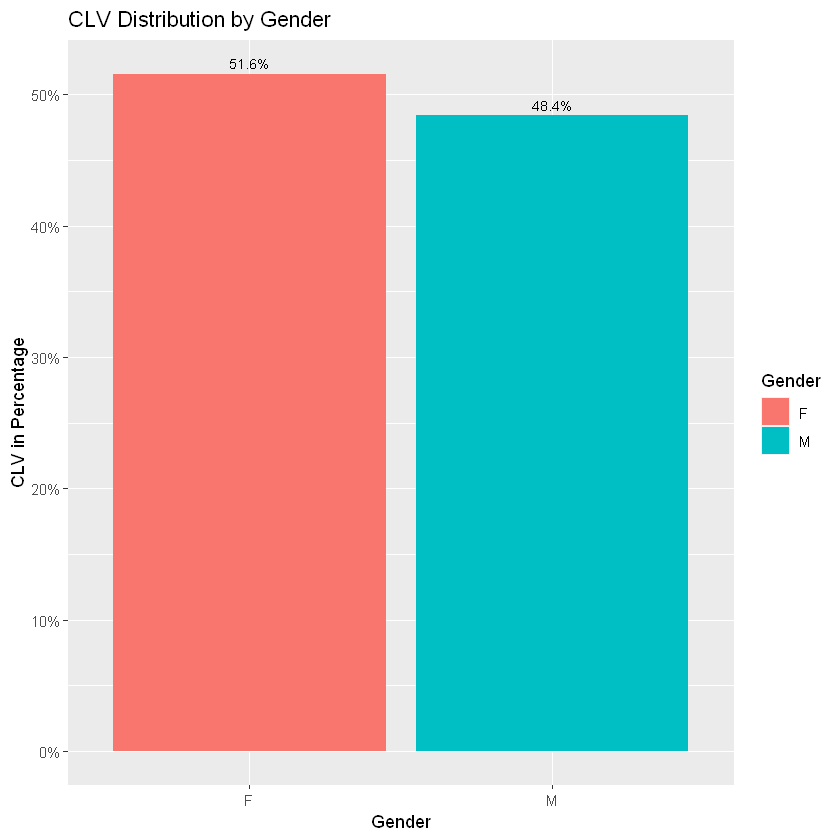

In [16]:
ggplot(InsuranceData, aes(x=Gender, y= CustomerLifetimeValue, fill = Gender)) + 
  geom_boxplot() + 
  labs(x="Gender",y = "Customer Life Time Value", fill="Gender") + 
  ggtitle("Visualization of CLV wrt Gender")


aggData <- aggregate(x = InsuranceData$CustomerLifetimeValue, by=list(Gender = InsuranceData$Gender), FUN = sum)

ggplot(data = aggData, aes(x = Gender, y = prop.table(stat(aggData$x)), fill = Gender, label = scales::percent(prop.table(stat(aggData$x))))) +
  geom_bar(stat="identity", position = "dodge") + 
  geom_text(stat = 'identity', position = position_dodge(.9),  vjust = -0.5, size = 3) + 
  scale_y_continuous(labels = scales::percent) + 
  labs(x = 'Gender', y = 'CLV in Percentage', fill = 'Gender') + 
  ggtitle("CLV Distribution by Gender")

Gender has no role to play in determining the value of a customer. Both Male and Female looks
valuable.

**4.05 Effect of Location on Customer Life Time Value (CLV)**

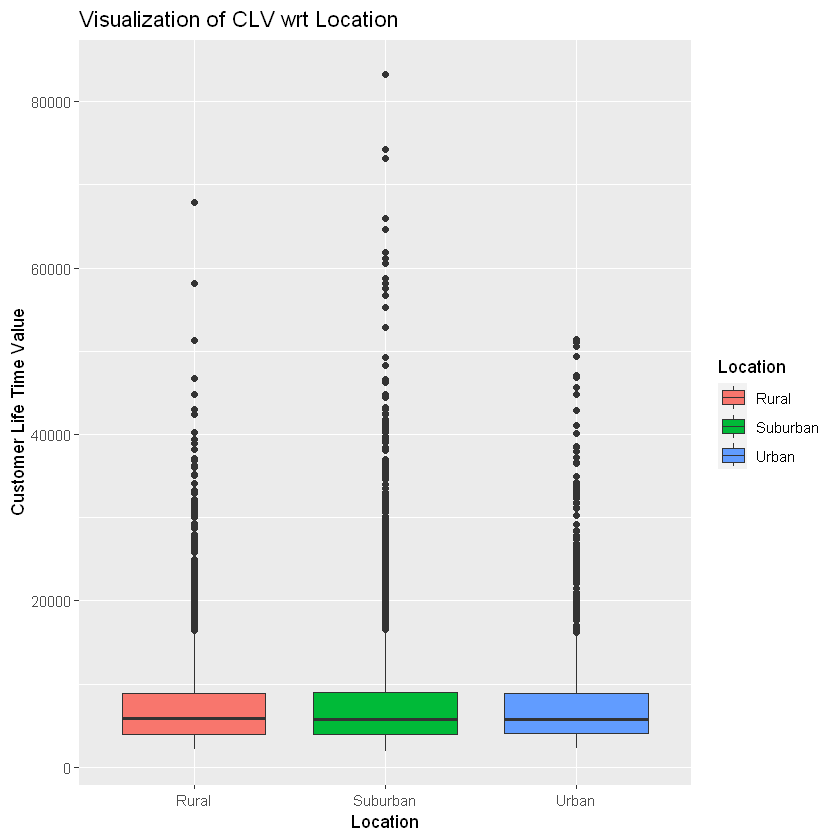

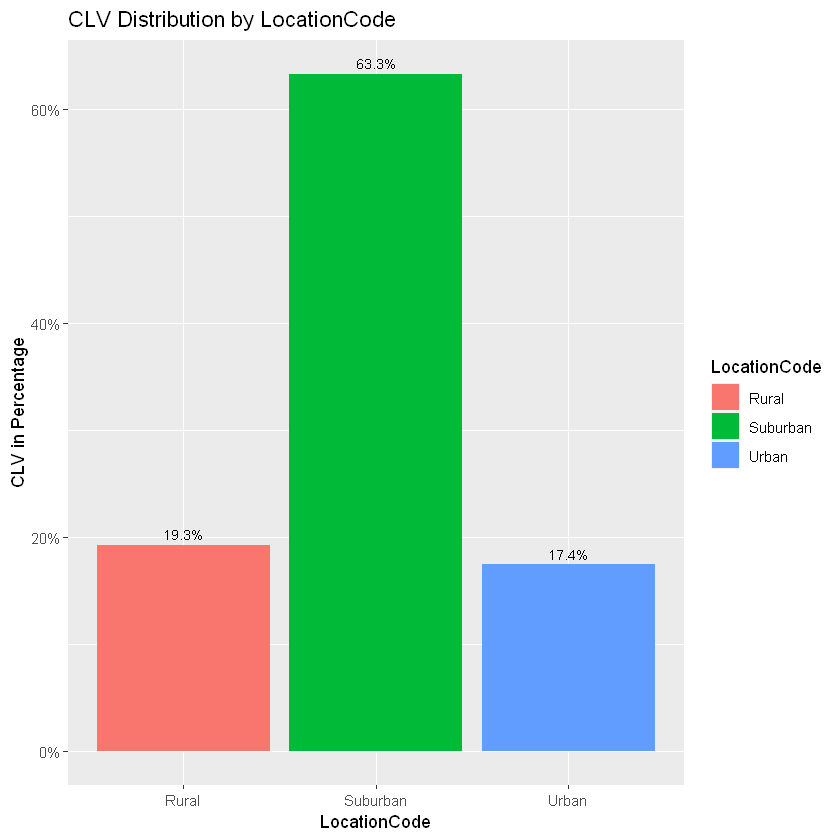

In [17]:
ggplot(InsuranceData, aes(x=LocationCode, y= CustomerLifetimeValue, fill = LocationCode)) + 
  geom_boxplot() + 
  labs(x="Location",y = "Customer Life Time Value", fill="Location") + 
  ggtitle("Visualization of CLV wrt Location")

aggData <- aggregate(x = InsuranceData$CustomerLifetimeValue, by=list(LocationCode = InsuranceData$LocationCode), FUN = sum)

ggplot(data = aggData, aes(x = LocationCode, y = prop.table(stat(aggData$x)), fill = LocationCode, label = scales::percent(prop.table(stat(aggData$x))))) +
  geom_bar(stat="identity", position = "dodge") + 
  geom_text(stat = 'identity', position = position_dodge(.9),  vjust = -0.5, size = 3) + 
  scale_y_continuous(labels = scales::percent) + 
  labs(x = 'LocationCode', y = 'CLV in Percentage', fill = 'LocationCode') + 
  ggtitle("CLV Distribution by LocationCode")

Rural customers are LESS valuable than Urban customers.

**4.06 Effect of Marital Status on Customer Life Time Value (CLV) **

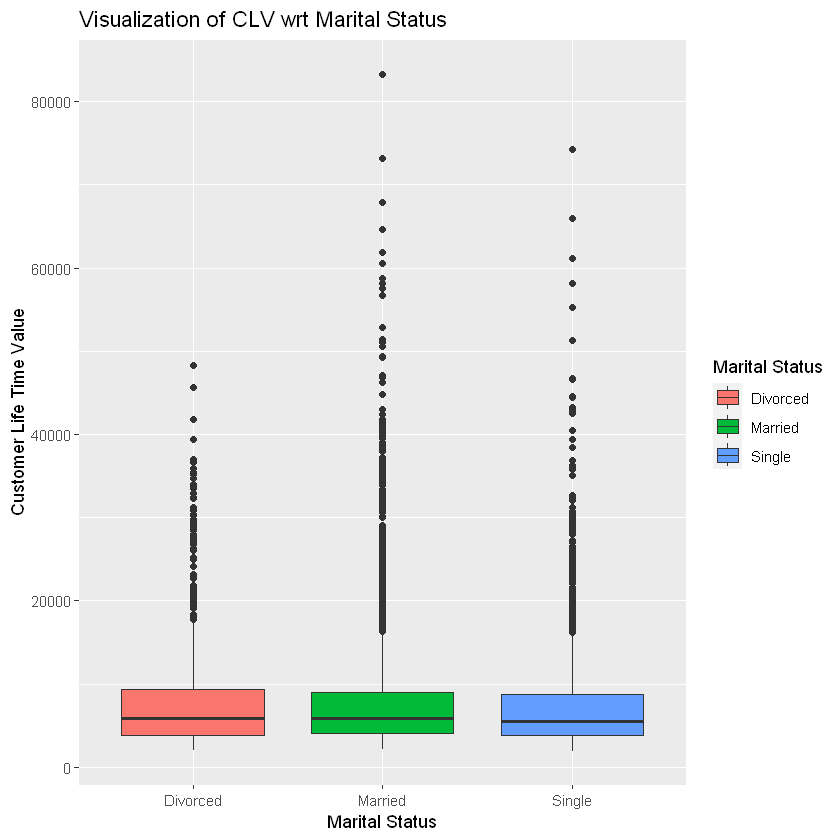

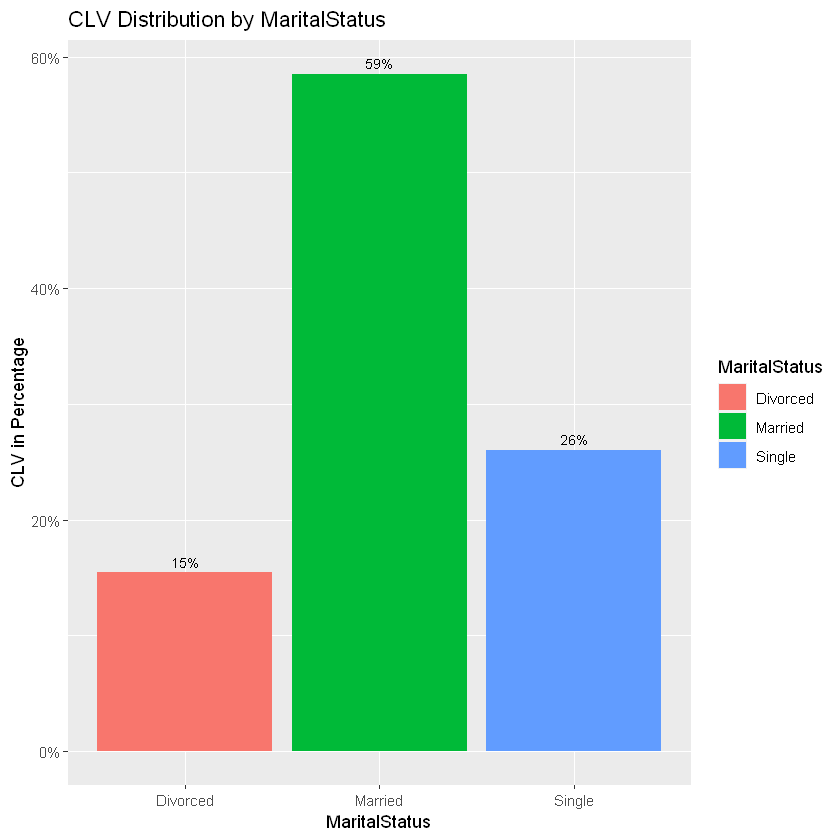

In [18]:
ggplot(InsuranceData, aes(x=MaritalStatus, y= CustomerLifetimeValue, fill = MaritalStatus)) + 
  geom_boxplot() + 
  labs(x="Marital Status",y = "Customer Life Time Value", fill="Marital Status") + 
  ggtitle("Visualization of CLV wrt Marital Status")

aggData <- aggregate(x = InsuranceData$CustomerLifetimeValue, by=list(MaritalStatus = InsuranceData$MaritalStatus), FUN = sum)

ggplot(data = aggData, aes(x = MaritalStatus, y = prop.table(stat(aggData$x)), fill = MaritalStatus, label = scales::percent(prop.table(stat(aggData$x))))) +
  geom_bar(stat="identity", position = "dodge") + 
  geom_text(stat = 'identity', position = position_dodge(.9),  vjust = -0.5, size = 3) + 
  scale_y_continuous(labels = scales::percent) + 
  labs(x = 'MaritalStatus', y = 'CLV in Percentage', fill = 'MaritalStatus') + 
  ggtitle("CLV Distribution by MaritalStatus")

Married customers are buying more auto insurance and adding more value to company.

**4.07 Effect of Policy Type on Customer Life Time Value (CLV)**

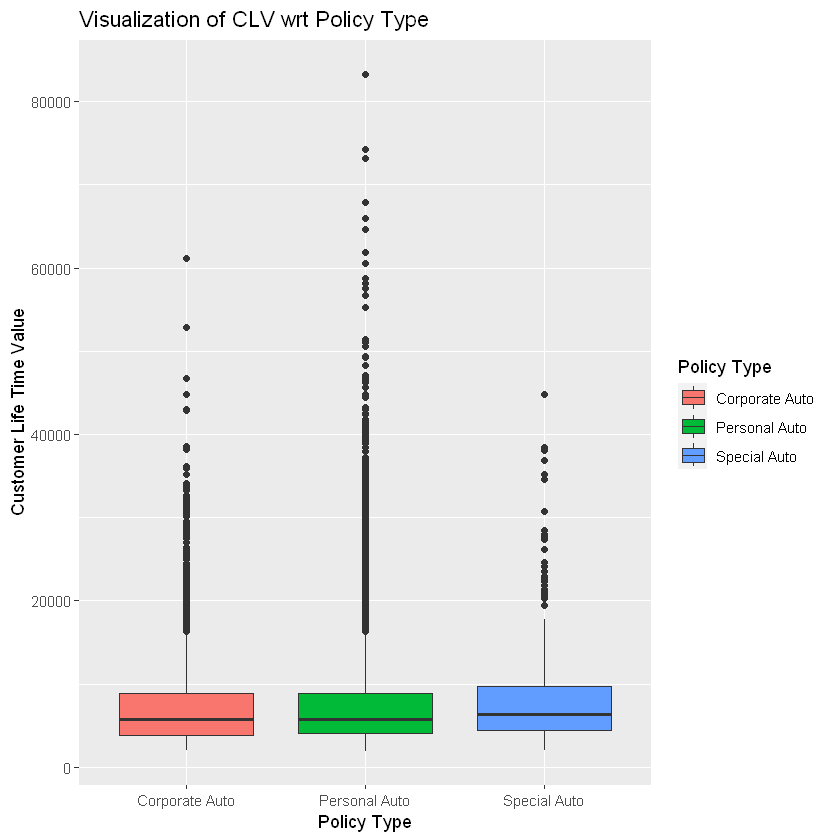

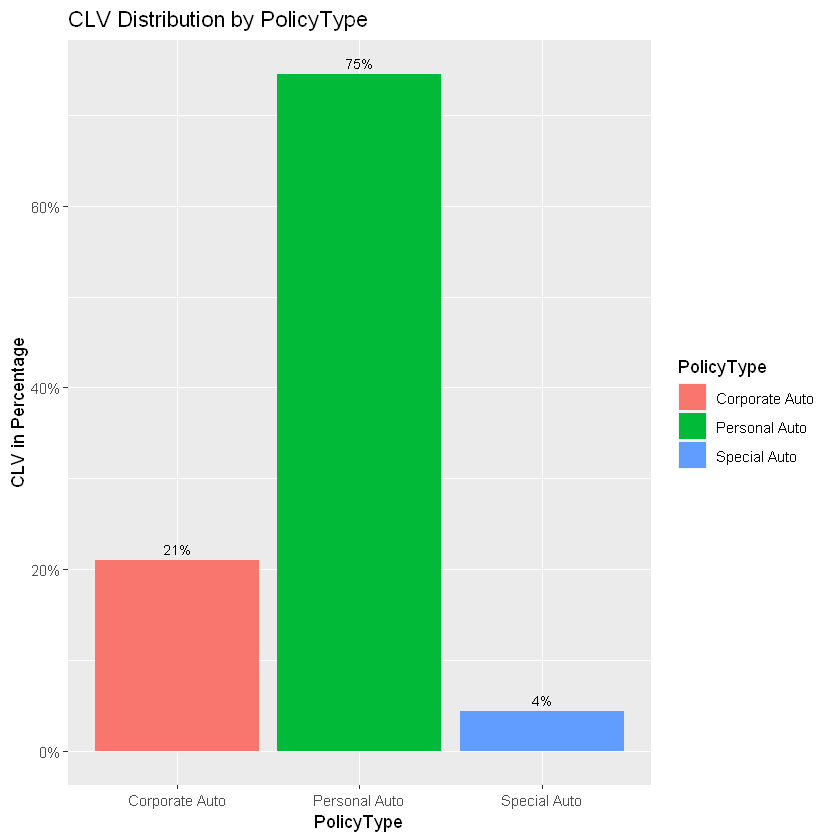

In [19]:
ggplot(InsuranceData, aes(x=PolicyType, y= CustomerLifetimeValue, fill = PolicyType)) + 
  geom_boxplot() + 
  labs(x="Policy Type",y = "Customer Life Time Value", fill="Policy Type") + 
  ggtitle("Visualization of CLV wrt Policy Type")

aggData <- aggregate(x = InsuranceData$CustomerLifetimeValue, by=list(PolicyType = InsuranceData$PolicyType), FUN = sum)

ggplot(data = aggData, aes(x = PolicyType, y = prop.table(stat(aggData$x)), fill = PolicyType, label = scales::percent(prop.table(stat(aggData$x))))) +
  geom_bar(stat="identity", position = "dodge") + 
  geom_text(stat = 'identity', position = position_dodge(.9),  vjust = -0.5, size = 3) + 
  scale_y_continuous(labels = scales::percent) + 
  labs(x = 'PolicyType', y = 'CLV in Percentage', fill = 'PolicyType') + 
  ggtitle("CLV Distribution by PolicyType")

Customers having thier own Persoanl Policy are more valuable to company then Corporate and Special
Insurance policy holder.

**4.08 Effect of Renew Offer Type on Customer Life Time Value (CLV)**

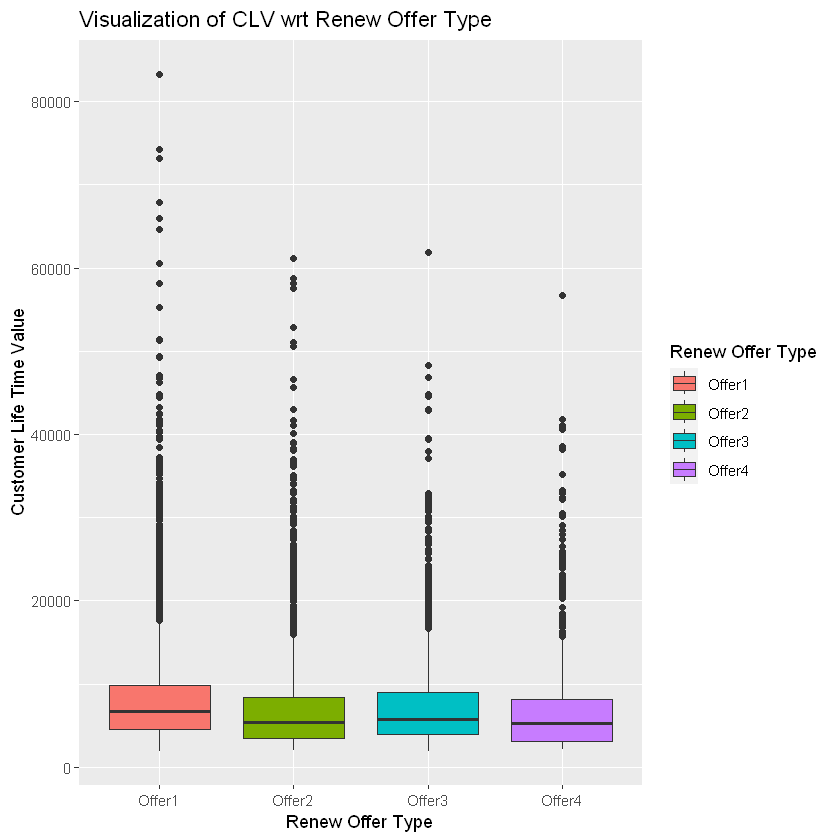

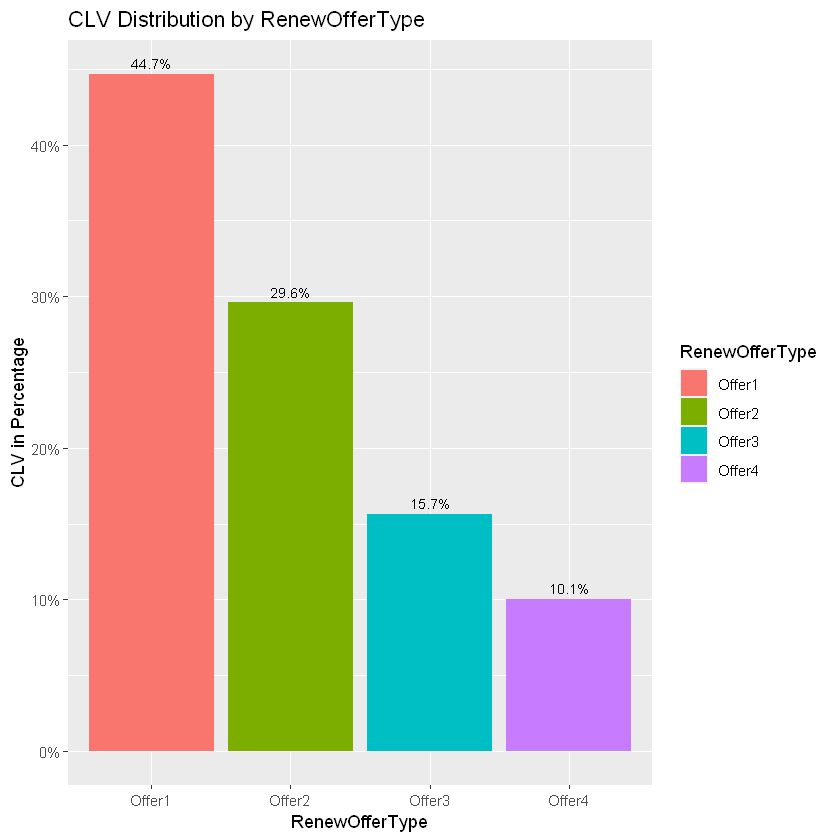

In [20]:
ggplot(InsuranceData, aes(x=RenewOfferType, y= CustomerLifetimeValue, fill = RenewOfferType)) + 
  geom_boxplot() + 
  labs(x="Renew Offer Type",y = "Customer Life Time Value", fill="Renew Offer Type") + 
  ggtitle("Visualization of CLV wrt Renew Offer Type")

aggData <- aggregate(x = InsuranceData$CustomerLifetimeValue, by=list(RenewOfferType = InsuranceData$RenewOfferType), FUN = sum)

ggplot(data = aggData, aes(x = RenewOfferType, y = prop.table(stat(aggData$x)), fill = RenewOfferType, label = scales::percent(prop.table(stat(aggData$x))))) +
  geom_bar(stat="identity", position = "dodge") + 
  geom_text(stat = 'identity', position = position_dodge(.9),  vjust = -0.5, size = 3) + 
  scale_y_continuous(labels = scales::percent) + 
  labs(x = 'RenewOfferType', y = 'CLV in Percentage', fill = 'RenewOfferType') + 
  ggtitle("CLV Distribution by RenewOfferType")

Offers 1 and Offer 2 attracts more customers.

**4.09 Effect of Sales Channel on Customer Life Time Value (CLV)**

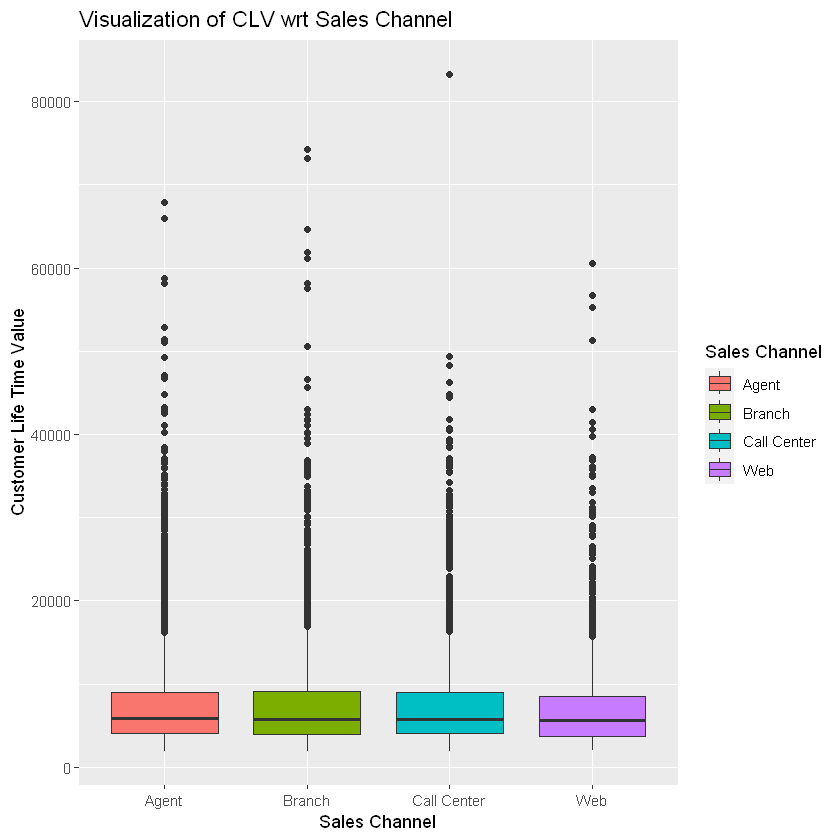

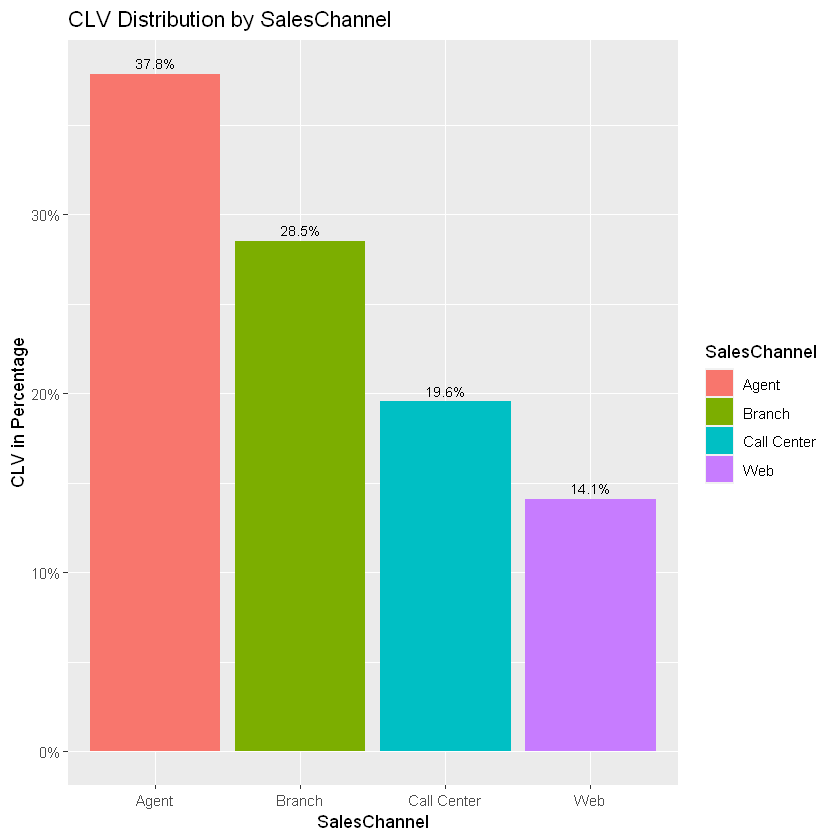

In [21]:
ggplot(InsuranceData, aes(x=SalesChannel, y= CustomerLifetimeValue, fill = SalesChannel)) + 
  geom_boxplot() + 
  labs(x="Sales Channel",y = "Customer Life Time Value", fill="Sales Channel") + 
  ggtitle("Visualization of CLV wrt Sales Channel")


aggData <- aggregate(x = InsuranceData$CustomerLifetimeValue, by=list(SalesChannel = InsuranceData$SalesChannel), FUN = sum)

ggplot(data = aggData, aes(x = SalesChannel, y = prop.table(stat(aggData$x)), fill = SalesChannel, label = scales::percent(prop.table(stat(aggData$x))))) +
  geom_bar(stat="identity", position = "dodge") + 
  geom_text(stat = 'identity', position = position_dodge(.9),  vjust = -0.5, size = 3) + 
  scale_y_continuous(labels = scales::percent) + 
  labs(x = 'SalesChannel', y = 'CLV in Percentage', fill = 'SalesChannel') + 
  ggtitle("CLV Distribution by SalesChannel")

Call Center is not performing well comparerd to other channels throughout the country (in terms of
high value customers)

**4.10 Effect of Vehicle Class on Customer Life Time Value (CLV)**

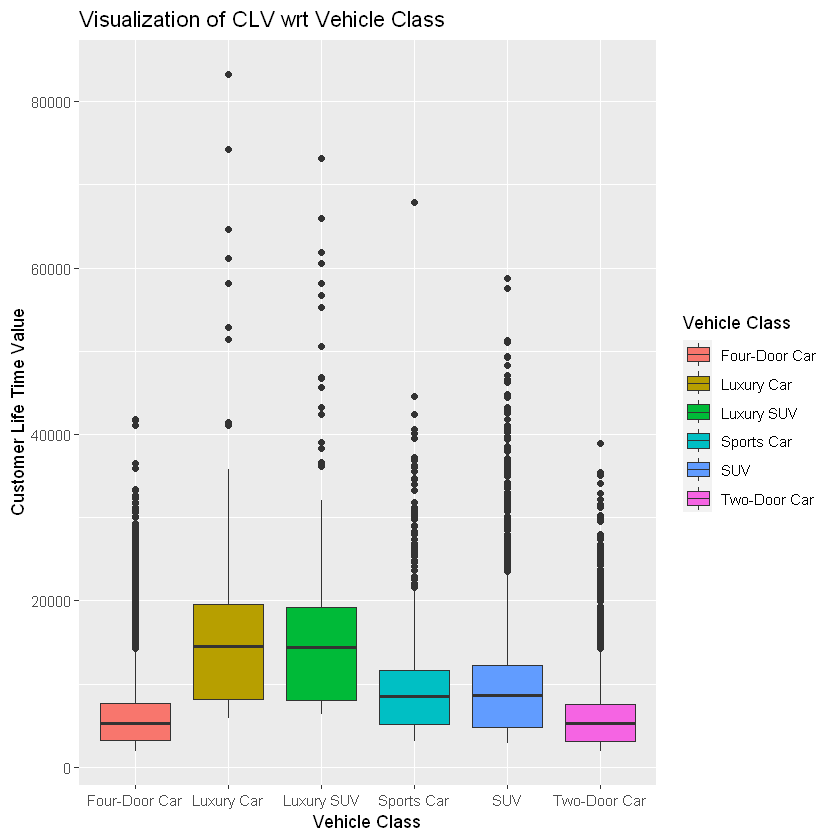

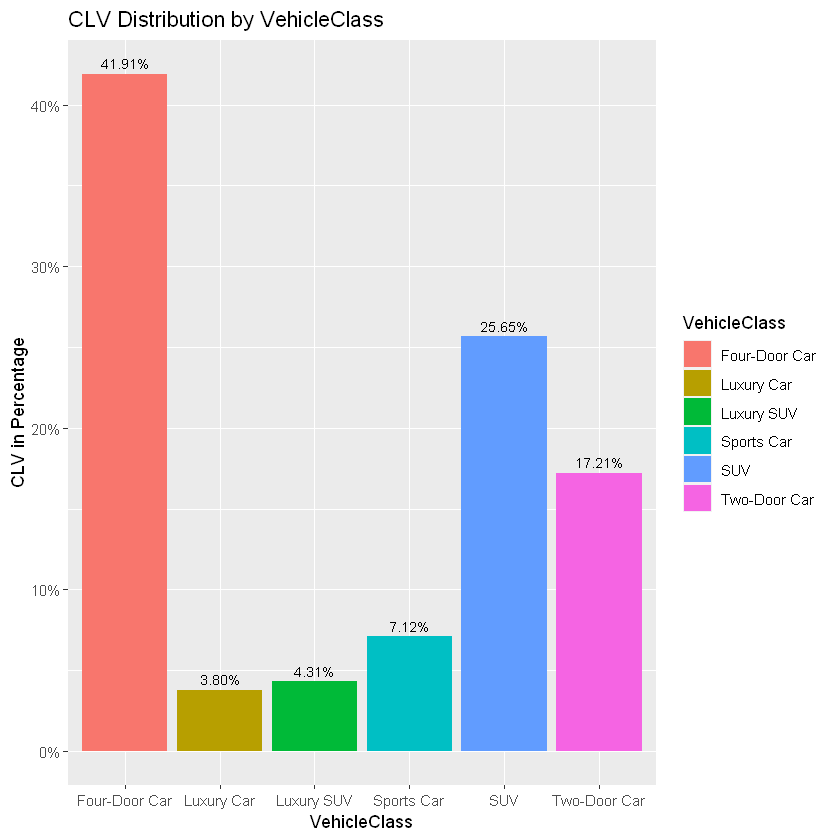

In [22]:
ggplot(InsuranceData, aes(x=VehicleClass, y= CustomerLifetimeValue, fill = VehicleClass)) + 
  geom_boxplot() + 
  labs(x="Vehicle Class",y = "Customer Life Time Value", fill="Vehicle Class") + 
  ggtitle("Visualization of CLV wrt Vehicle Class")

aggData <- aggregate(x = InsuranceData$CustomerLifetimeValue, by=list(VehicleClass = InsuranceData$VehicleClass), FUN = sum)

ggplot(data = aggData, aes(x = VehicleClass, y = prop.table(stat(aggData$x)), fill = VehicleClass, label = scales::percent(prop.table(stat(aggData$x))))) +
  geom_bar(stat="identity", position = "dodge") + 
  geom_text(stat = 'identity', position = position_dodge(.9),  vjust = -0.5, size = 3) + 
  scale_y_continuous(labels = scales::percent) + 
  labs(x = 'VehicleClass', y = 'CLV in Percentage', fill = 'VehicleClass') + 
  ggtitle("CLV Distribution by VehicleClass")

Customers having Four-Door car and SUV are more valuable.

**4.11 Effect of Vehicle Size on Customer Life Time Value (CLV)**

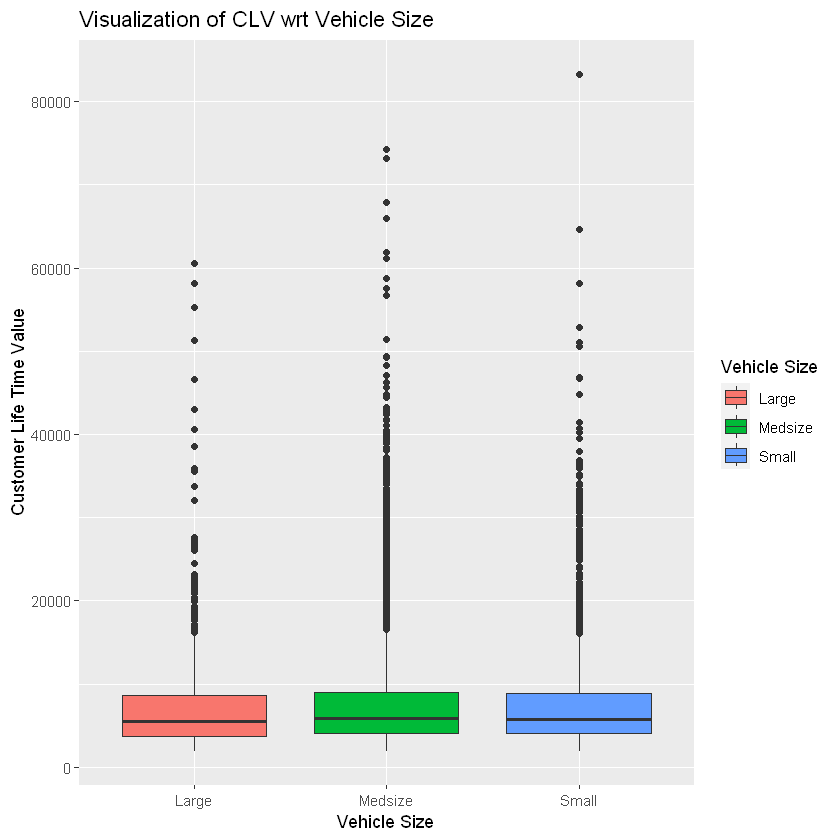

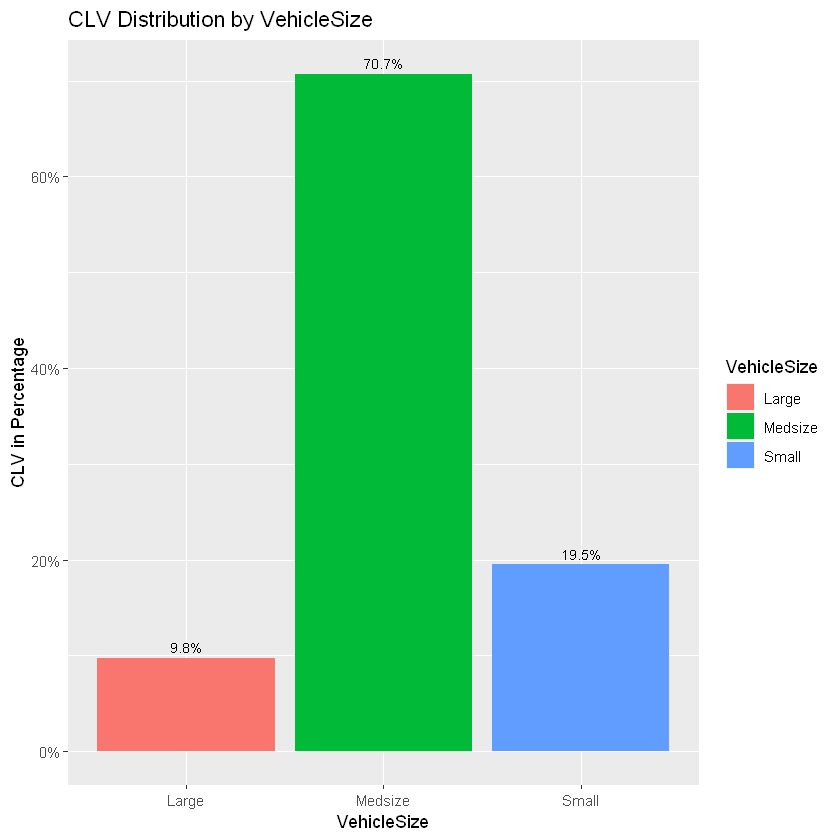

In [23]:
ggplot(InsuranceData, aes(x=VehicleSize, y= CustomerLifetimeValue, fill = VehicleSize)) + 
  geom_boxplot() + 
  labs(x="Vehicle Size",y = "Customer Life Time Value", fill="Vehicle Size") + 
  ggtitle("Visualization of CLV wrt Vehicle Size")

aggData <- aggregate(x = InsuranceData$CustomerLifetimeValue, by=list(VehicleSize = InsuranceData$VehicleSize), FUN = sum)

ggplot(data = aggData, aes(x = VehicleSize, y = prop.table(stat(aggData$x)), fill = VehicleSize, label = scales::percent(prop.table(stat(aggData$x))))) +
  geom_bar(stat="identity", position = "dodge") + 
  geom_text(stat = 'identity', position = position_dodge(.9),  vjust = -0.5, size = 3) + 
  scale_y_continuous(labels = scales::percent) + 
  labs(x = 'VehicleSize', y = 'CLV in Percentage', fill = 'VehicleSize') + 
  ggtitle("CLV Distribution by VehicleSize")

Customers having Mid Size vehicals are adding more value to Insurance company.

**4.12 Effect of States on Customer Life Time Value (CLV)**

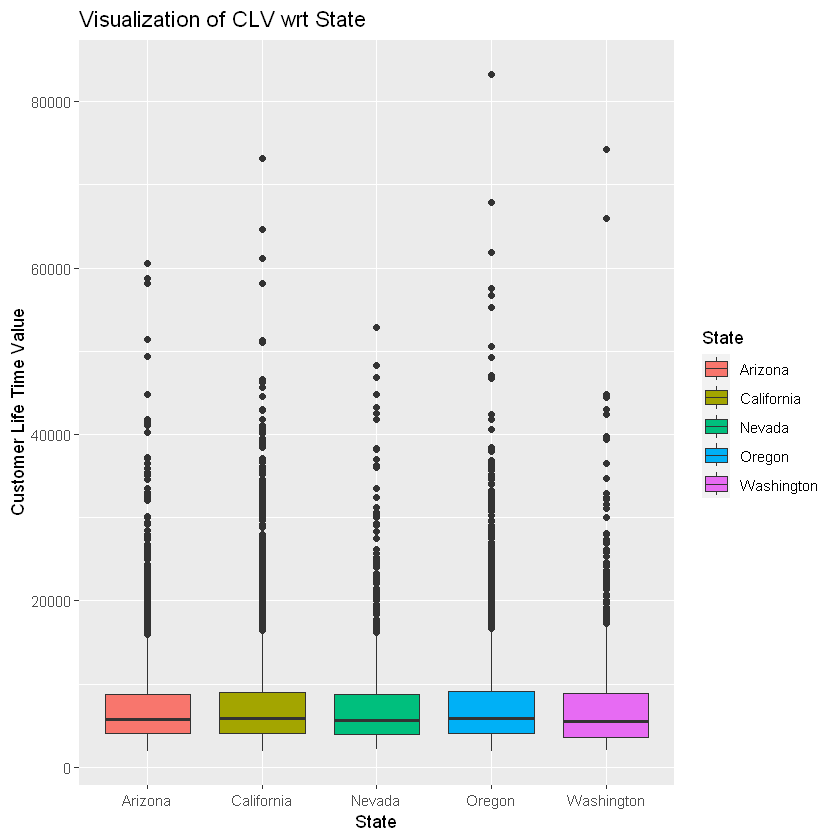

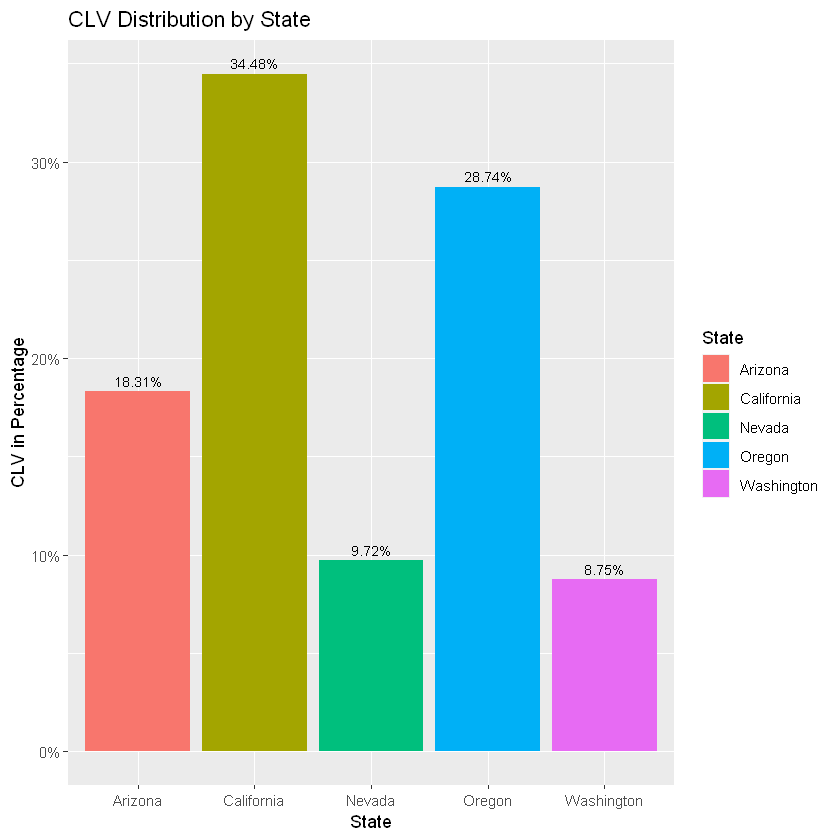

In [24]:
ggplot(InsuranceData, aes(x=State, y= CustomerLifetimeValue, fill = State)) + 
  geom_boxplot() + 
  labs(x="State",y = "Customer Life Time Value", fill="State") + 
  ggtitle("Visualization of CLV wrt State")

aggData <- aggregate(x = InsuranceData$CustomerLifetimeValue, by=list(State = InsuranceData$State), FUN = sum)

ggplot(data = aggData, aes(x = State, y = prop.table(stat(aggData$x)), fill = State, label = scales::percent(prop.table(stat(aggData$x))))) +
  geom_bar(stat="identity", position = "dodge") + 
  geom_text(stat = 'identity', position = position_dodge(.9),  vjust = -0.5, size = 3) + 
  scale_y_continuous(labels = scales::percent) + 
  labs(x = 'State', y = 'CLV in Percentage', fill = 'State') + 
  ggtitle("CLV Distribution by State")

California customers are more valuable.

**4.13 Effect of Policy on Customer Life Time Value (CLV)**

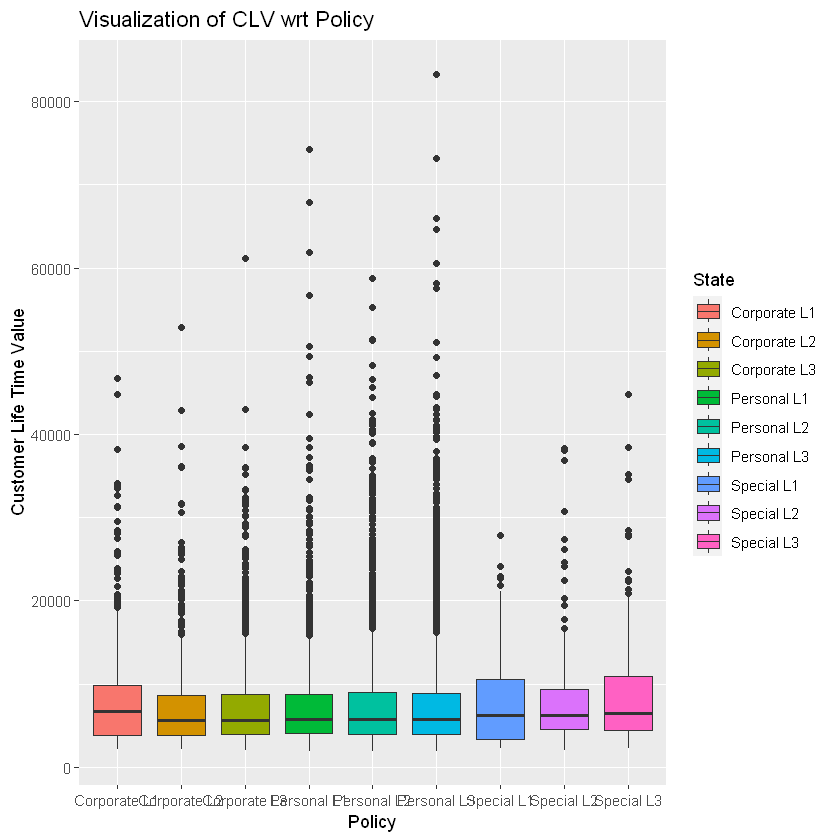

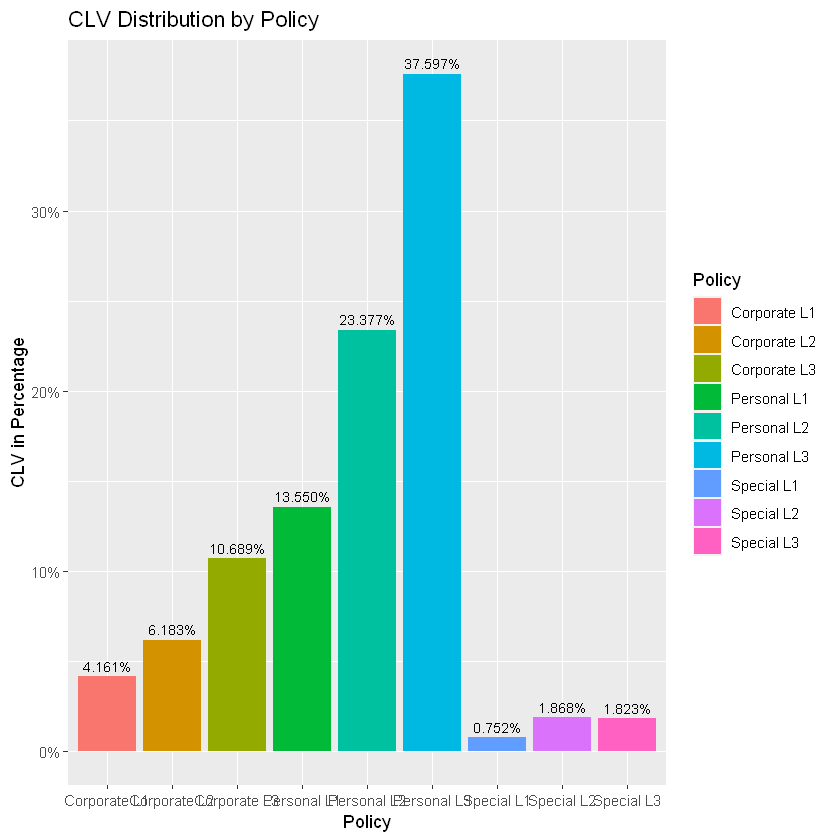

In [25]:
ggplot(InsuranceData, aes(x=Policy, y= CustomerLifetimeValue, fill = Policy)) + 
  geom_boxplot() + 
  labs(x="Policy",y = "Customer Life Time Value", fill="State") + 
  ggtitle("Visualization of CLV wrt Policy")

aggData <- aggregate(x = InsuranceData$CustomerLifetimeValue, by=list(Policy = InsuranceData$Policy), FUN = sum)

ggplot(data = aggData, aes(x = Policy, y = prop.table(stat(aggData$x)), fill = Policy, label = scales::percent(prop.table(stat(aggData$x))))) +
  geom_bar(stat="identity", position = "dodge") + 
  geom_text(stat = 'identity', position = position_dodge(.9),  vjust = -0.5, size = 3) + 
  scale_y_continuous(labels = scales::percent) + 
  labs(x = 'Policy', y = 'CLV in Percentage', fill = 'Policy') + 
  ggtitle("CLV Distribution by Policy")

Personal L3 Policy is adding more value to company.

# 5. Regression Analysis with Continuous Variables

1. Dependent Variable CLV is continuous and we have seen that independent variables are mostly depending linearly with dependent Variable, So Linear Regression algorithm is best for this type of this Data.
1. The goal of the Linear regression is to find the best fit line that can accurately predict the output for the continuous dependent variable.
1. Removing qualitative variables because Linear Regression works best when variables are quantitative/numeric in nature. We have only 8 continuous independent variables.

In [26]:
dataContinous <- dplyr::select_if(InsuranceData, ~!is.factor(.))
str(dataContinous)

'data.frame':	9134 obs. of  23 variables:
 $ State                     : chr  "Washington" "Arizona" "Nevada" "California" ...
 $ CustomerLifetimeValue     : num  2764 6980 12887 7646 2814 ...
 $ Response                  : chr  "No" "No" "No" "No" ...
 $ Coverage                  : chr  "Basic" "Extended" "Premium" "Basic" ...
 $ Education                 : chr  "Bachelor" "Bachelor" "Bachelor" "Bachelor" ...
 $ EffectiveToDate           : chr  "2/24/11" "1/31/11" "2/19/11" "1/20/11" ...
 $ EmploymentStatus          : chr  "Employed" "Unemployed" "Employed" "Unemployed" ...
 $ Gender                    : chr  "F" "F" "F" "M" ...
 $ Income                    : int  56274 0 48767 0 43836 62902 55350 0 14072 28812 ...
 $ LocationCode              : chr  "Suburban" "Suburban" "Suburban" "Suburban" ...
 $ MaritalStatus             : chr  "Married" "Single" "Married" "Married" ...
 $ MonthlyPremiumAuto        : int  69 94 108 106 73 69 67 101 71 93 ...
 $ MonthsSinceLastClaim      : int  32

In [27]:
dim(dataContinous)

[1] 9134   23

**Linear Regression**

In [28]:
#Regression
#lm is used to fit linear models. It can be used to carry out regression, single stratum analysis of variance and analysis of covariance.

# Creating Linear Regression Model using all the continues indepedent variables.
fit <- lm(dataContinous$CustomerLifetimeValue ~., data = dataContinous) 
summary(fit) 


Call:
lm(formula = dataContinous$CustomerLifetimeValue ~ ., data = dataContinous)

Residuals:
   Min     1Q Median     3Q    Max 
-13126  -3254  -1332    768  61569 

Coefficients: (2 not defined because of singularities)
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    2.459e+03  1.039e+03   2.366 0.018008 *  
StateCalifornia                4.024e+01  1.898e+02   0.212 0.832131    
StateNevada                    1.020e+02  2.619e+02   0.389 0.696976    
StateOregon                    9.166e+01  1.966e+02   0.466 0.641148    
StateWashington                1.754e+02  2.704e+02   0.649 0.516636    
ResponseYes                   -3.355e+02  2.110e+02  -1.590 0.111814    
CoverageExtended               1.256e+02  2.503e+02   0.502 0.615818    
CoveragePremium                4.618e+01  5.293e+02   0.087 0.930478    
EducationCollege               7.241e+00  1.719e+02   0.042 0.966396    
EducationDoctor               -1.393e+02  3.644

**5.1.1 Model Interpretation:**

**Null Hypothesis** - None of the independant variables are significant for CLV.

**Alternate Hypothesis** - At least one of the independent variables are significant and can effect the CLV.

1. p-value of model is less than 0.05, so atleast one of the independent variables are significant.
1. p-value of MonthlyPremiumAuto, NumberofOpenComplaints and NumberofPolicies are less then 0.05, so rejecting the null hypothesis. So atlest one of them independed variables are significant and can effect the CLV.
1. However R squared is very low, only 16.02% of the variance found in the CLV can be explained by Income, MPA, MonthsSinceLastClaim, MonthsSincePolicyInception, NumberofOpenComplaints, NumberofPolicies, TCA.
1. Adjusted R squared is 0.1537 which is less than R squared.
1. Residual standard error is 6322 which is very very high, so it means the actual CLV will deviate from the true regression line by approximately 6322 on an average. The smaller the standard error, the less the spread and the more likely it is that any sample mean is close to the population mean. A small standard error is thus a Good Thing.
1. Gap between R-squared and Adjusted R-squared is 1.4% only, which is good. Typically the more non-significant variables you add into the model, the gap between two increases.
1. F-statistic: 6.958 - The lower the F-statistic, the closer to a non-significant model. So F-statistic is low means it is not very significant model.

**5.1.2. Rerun Model**


There are more than one insignificant variables in the model, so need to run the model again with only
significant variables.

In [42]:
new_fit <- lm(dataContinous$CustomerLifetimeValue ~ 
              MonthlyPremiumAuto + NumberofOpenComplaints + NumberofPolicies + TotalClaimAmount , 
              data = dataContinous) 
summary(new_fit) 



Call:
lm(formula = dataContinous$CustomerLifetimeValue ~ MonthlyPremiumAuto + 
    NumberofOpenComplaints + NumberofPolicies + TotalClaimAmount, 
    data = dataContinous)

Residuals:
   Min     1Q Median     3Q    Max 
-12531  -3353  -1145    907  64346 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)             433.9596   211.0132   2.057  0.03976 *  
MonthlyPremiumAuto       84.2155     2.4725  34.061  < 2e-16 ***
NumberofOpenComplaints -237.1804    72.4195  -3.275  0.00106 ** 
NumberofPolicies         76.5939    27.5826   2.777  0.00550 ** 
TotalClaimAmount         -0.9573     0.2928  -3.269  0.00108 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6300 on 9129 degrees of freedom
Multiple R-squared:  0.1597,	Adjusted R-squared:  0.1593 
F-statistic: 433.7 on 4 and 9129 DF,  p-value: < 2.2e-16


The estimated regression line equation can be written as follow:

CLV = 433.96 + 84.21 MPA - 237.18 NoOC + 76.59 NoP - 0.96 TCA

**New Model Interpretation**


**Null Hypothesis** - None of the independent variables are significant for CLV.

**Alternate Hypothesis** – At least one of the independent variables are significant and can effect the
CLV.

1. p-value of MonthlyPremiumAuto, NumberofOpenComplaints, NumberofPolicies and TotalClaimAmount is less than 0.05 so they are significantly impact the CLV.
1. Coefficients of Independent Variables :-

    i. MonthlyPremiumAuto : 86.4478. One unit increase in MonthlyPremiumAuto will increase CLV by 86.4478

    ii. NumberofOpenComplaints : -199.3526. One unit increase in NumberofOpenComplaints will decrease CLV by 199.3526

    iii. NumberofPolicies : 76.3861. One unit increase in NumberofPolicies will increase CLV by 76.3861

    iv. TotalClaimAmount : -1.0445. one unit increase in TotalClaimAmount will decrease by 1.0445

1. So the customers having more number of policies with high monthly premium will add more value to company.
1. On the other hand, customer's Open Complaints and More Claim Amount will decrease the CLV.
1. R squared is 0.1656 which means 16.56% of dependent variable is explained by independ variable.
1. Adjusted R squared is 0.1652 which is less than R squared.

**Check the normality of Error/Residual Term (Linear Regression assumes that error are normally distributed.)**


**Null Hypotheses** - Errors are normally distributed. 

**Alt Hypothese** - Errors are not normally distributed.

In [30]:
# Extract the residuals
residuals <- residuals(new_fit)

shapiro.test(residuals[0:5000])



	Shapiro-Wilk normality test

data:  residuals[0:5000]
W = 0.7318, p-value < 2.2e-16


In [38]:
ks.test(residuals, "pnorm", mean(residuals), sd(residuals))


Warning message in ks.test(residuals, "pnorm", mean(residuals), sd(residuals)):
"ties should not be present for the Kolmogorov-Smirnov test"



	One-sample Kolmogorov-Smirnov test

data:  residuals
D = 0.26084, p-value < 2.2e-16
alternative hypothesis: two-sided


p-value(0.00837) < 0.05, Null Hypotheses get rejected, and so the errors are not normally distributed.

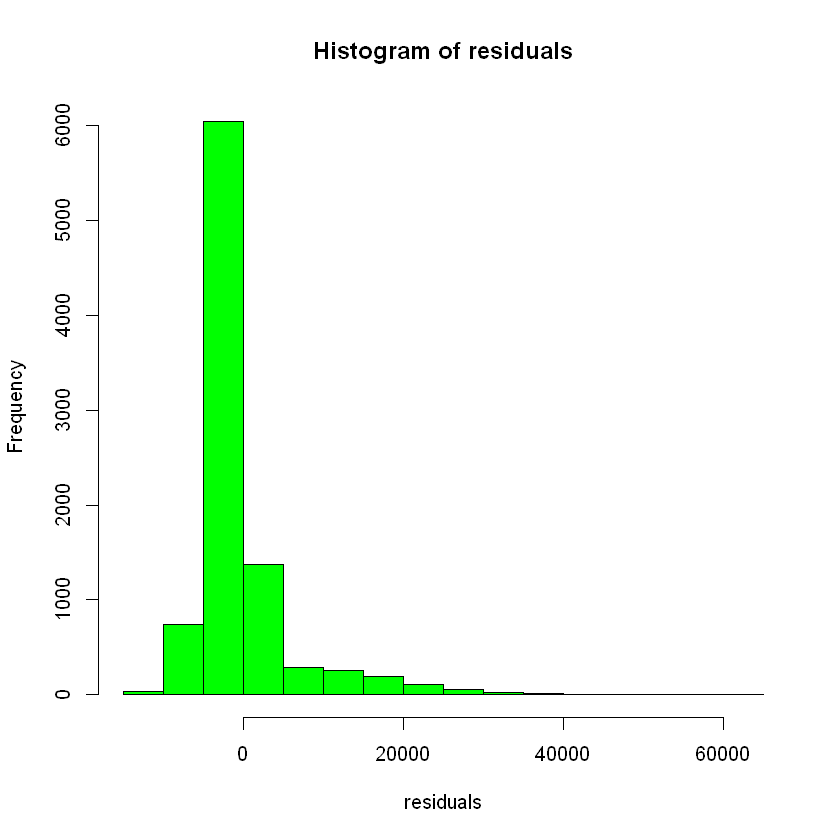

In [31]:
hist(residuals,col = "green")


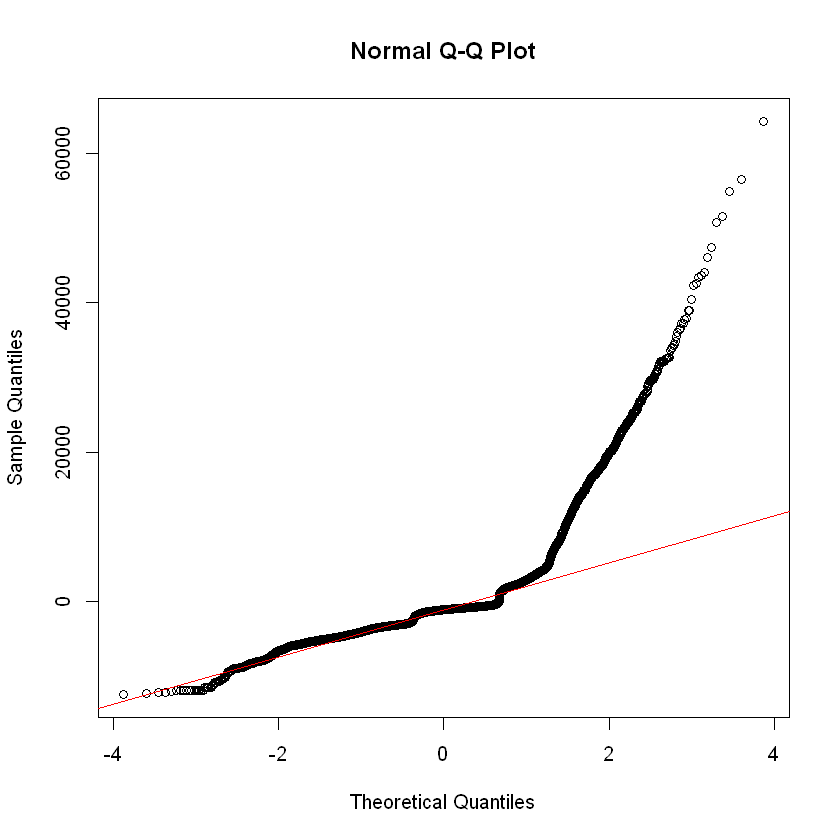

In [39]:
qqnorm(residuals)
qqline(residuals, col = "red")


**Residuals vs Fitted Plot**

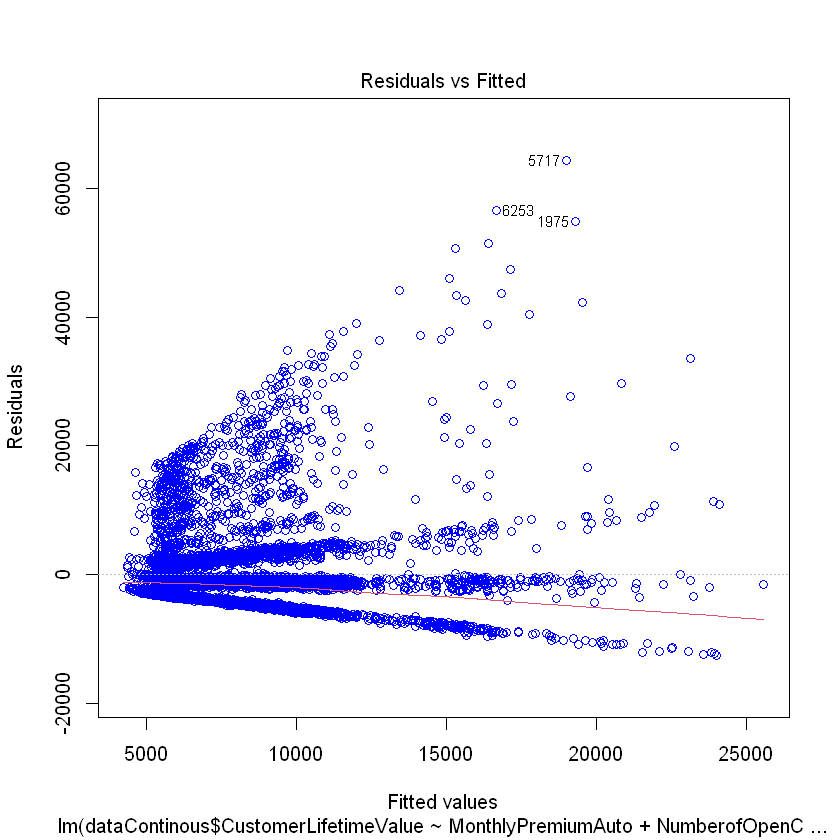

In [32]:
plot(new_fit, which=1, col=c("blue"))


# 6. Assumpation Testing of Linear Regression Analysis

**1. Detecting multicollinearity** - checking correlation between independent variables.

In our model, only those independent variable should exist which are not correlated with each other.
This is done using Correlation Matrix.

                       MonthlyPremiumAuto NumberofOpenComplaints
MonthlyPremiumAuto             1.00000000            -0.01312167
NumberofOpenComplaints        -0.01312167             1.00000000
NumberofPolicies              -0.01123303             0.00149829
TotalClaimAmount               0.63201666            -0.01424144
                       NumberofPolicies TotalClaimAmount
MonthlyPremiumAuto         -0.011233031      0.632016663
NumberofOpenComplaints      0.001498290     -0.014241441
NumberofPolicies            1.000000000     -0.002353596
TotalClaimAmount           -0.002353596      1.000000000


MonthlyPremiumAuto NumberofOpenComplaints       NumberofPolicies 
              1.665437               1.000233               1.000166 
      TotalClaimAmount 
              1.665287

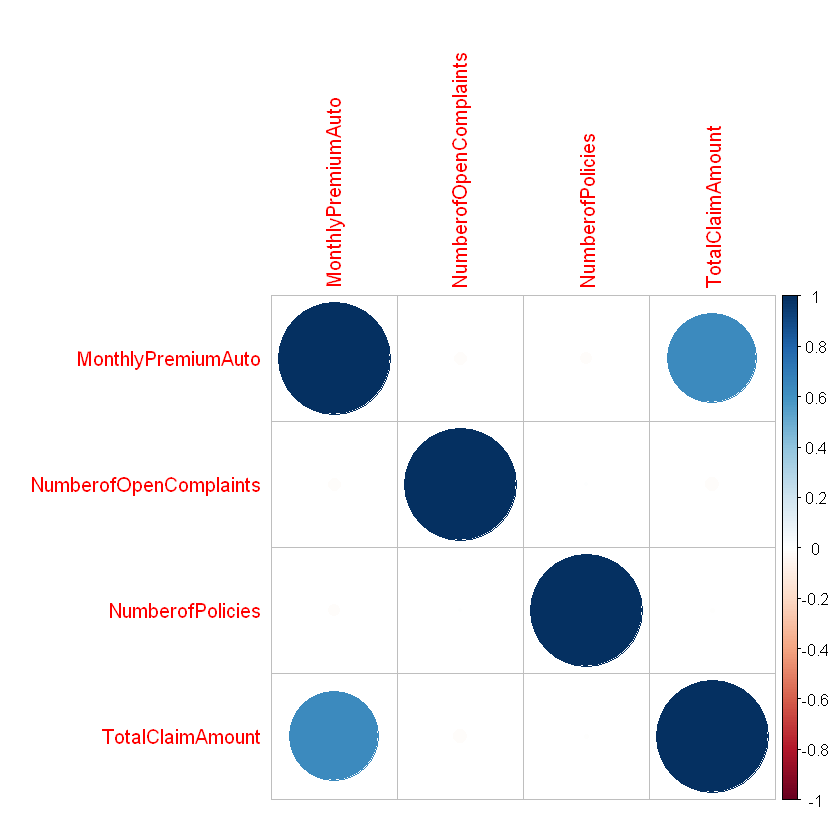

In [33]:
cor_matrix <- cor(dataContinous[, c("MonthlyPremiumAuto", "NumberofOpenComplaints", "NumberofPolicies", "TotalClaimAmount")])

# Print the correlation matrix
print(cor_matrix)


# Create a correlation plot
corrplot(cor_matrix, method = "circle")

# Variance Inflation Factors
car::vif(new_fit)

Variance inflation factor (VIF) is a measure of the amount of multicollinearity in a set of multiple regression variables. 

If there is high correlation between two independed variables (high multicollinearity), then you will not be able to seperate out the impact of individual independed variable on depended variable.

Due to multicolinearity we can't define the complete impact of only one independed variable on the depended variable.


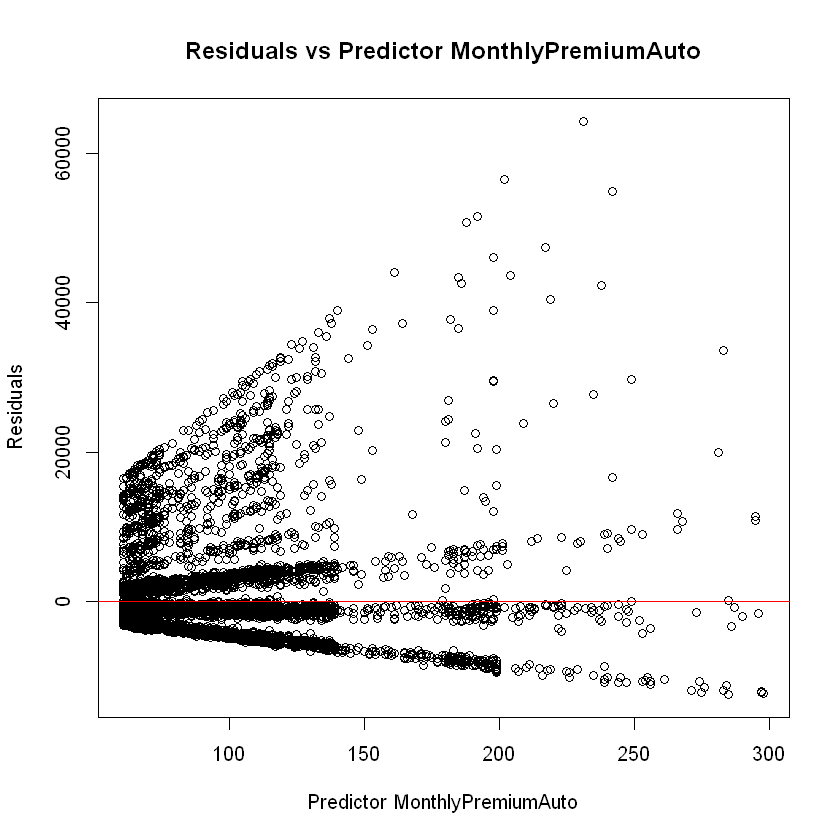

In [44]:
plot(dataContinous$MonthlyPremiumAuto, residuals,
     xlab = "Predictor MonthlyPremiumAuto",
     ylab = "Residuals",
     main = "Residuals vs Predictor MonthlyPremiumAuto")
abline(h = 0, col = "red")

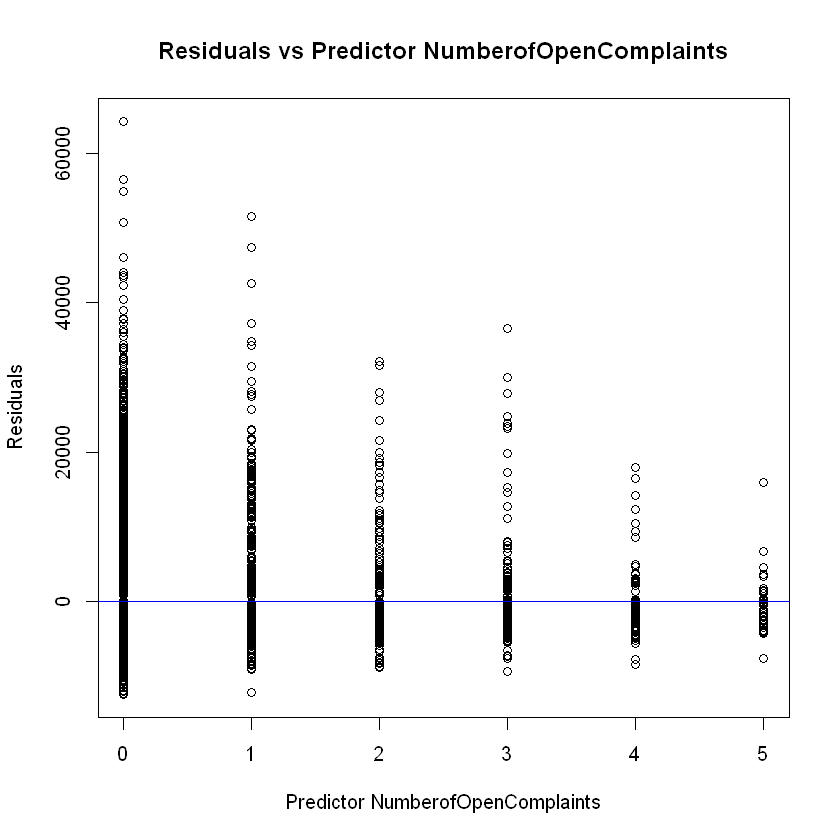

In [45]:
plot(dataContinous$NumberofOpenComplaints, residuals,
     xlab = "Predictor NumberofOpenComplaints",
     ylab = "Residuals",
     main = "Residuals vs Predictor NumberofOpenComplaints")
abline(h = 0, col = "blue")

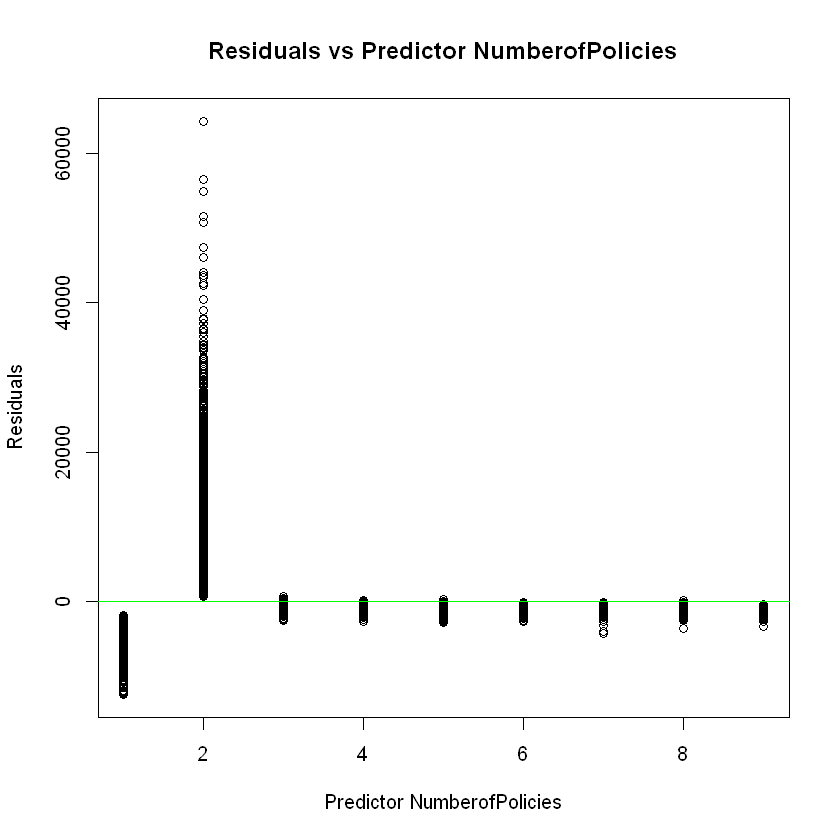

In [46]:
plot(dataContinous$NumberofPolicies, residuals,
     xlab = "Predictor NumberofPolicies",
     ylab = "Residuals",
     main = "Residuals vs Predictor NumberofPolicies")
abline(h = 0, col = "green")

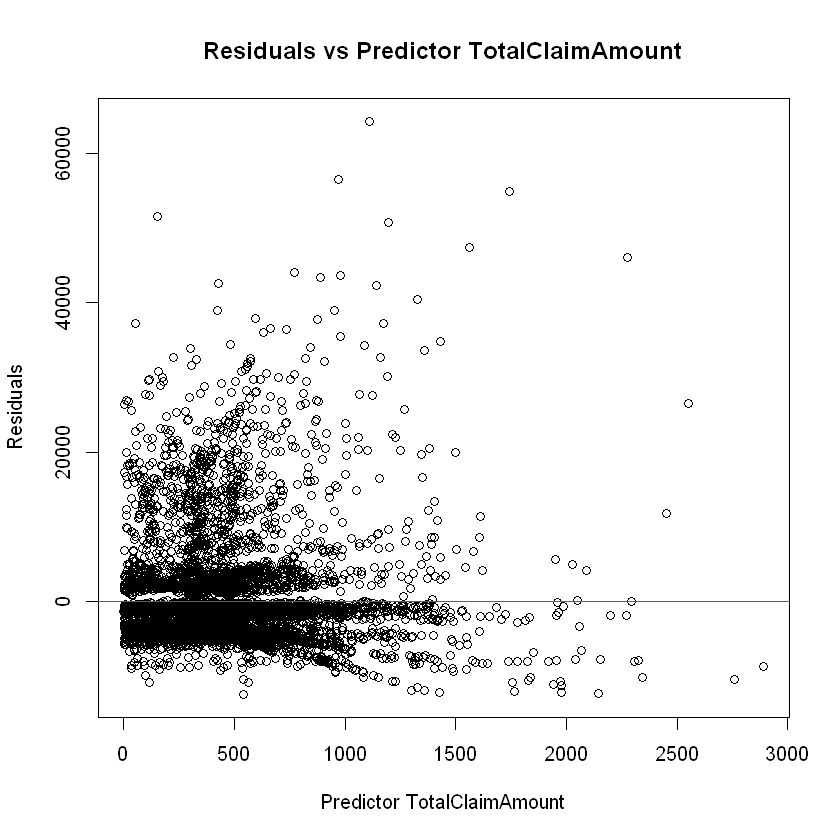

In [49]:
plot(dataContinous$TotalClaimAmount, residuals,
     xlab = "Predictor TotalClaimAmount",
     ylab = "Residuals",
     main = "Residuals vs Predictor TotalClaimAmount")
abline(h = 0, col = "purple")

**2. Detecting Homoscedasticity** - variance for all observations are not the same

**Null Hypothesis** - Homoscedasticity is present in Residuals.

**Alternate hypothesis** - Heteroskedasticity is present in residuals.

This is done by Breusch-Pagan test.

In [34]:
bptest(new_fit)


	studentized Breusch-Pagan test

data:  new_fit
BP = 513.51, df = 4, p-value < 2.2e-16


p-value < 0.05, so it rejects that errors have homoscedasticity. 
So errors terms have heteroscedasticity and does not have constant variance which is not good for model.

**3. Detecting Autocorrelation** - checking autocorrelation (Checking correlation between errors)

This is done Durbin-Watson Test
If D-W Statistic is around 2, then we have autocorrelation in model. and away from 2 means no
autocorrelation.

In [35]:
dwt(new_fit)

 lag Autocorrelation D-W Statistic p-value
   1     0.001213565        1.9975   0.844
 Alternative hypothesis: rho != 0

Here D-W Statistic is 1.9975, so there is autocorrelation in the model.

# 7. Removing Heteroskedasticity

In [36]:
library(broom)
tidy.g <- function(model,vc=vcov(model),conf.int=FALSE,conf.level=0.95){
  dt <- tidy(model,conf.int=conf.int,conf.level=conf.level)
  dt$std.error <- sqrt(diag(vc))
  dt$statistic <- dt$estimate/dt$std.error
  dt$p.value <- 2*pt(-abs(dt$statistic),df=glance(model)$df.residual)
  if(conf.int){
    dt$conf.low <- dt$estimate+qt((1-conf.level)/2,df=glance(model)$df.residual)*dt$std.error
    dt$conf.high <- dt$estimate-qt((1-conf.level)/2,df=glance(model)$df.residual)*dt$std.error
  }
  return(dt)
}
tidy.w <- function(model,...)tidy.g(model,vc=sandwich::vcovHC(model),...)
hdf_fit <- tidy.w(new_fit)
summary(new_fit)
hdf_fit


Call:
lm(formula = dataContinous$CustomerLifetimeValue ~ MonthlyPremiumAuto + 
    NumberofOpenComplaints + NumberofPolicies + TotalClaimAmount, 
    data = dataContinous)

Residuals:
   Min     1Q Median     3Q    Max 
-12531  -3353  -1145    907  64346 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)             433.9596   211.0132   2.057  0.03976 *  
MonthlyPremiumAuto       84.2155     2.4725  34.061  < 2e-16 ***
NumberofOpenComplaints -237.1804    72.4195  -3.275  0.00106 ** 
NumberofPolicies         76.5939    27.5826   2.777  0.00550 ** 
TotalClaimAmount         -0.9573     0.2928  -3.269  0.00108 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6300 on 9129 degrees of freedom
Multiple R-squared:  0.1597,	Adjusted R-squared:  0.1593 
F-statistic: 433.7 on 4 and 9129 DF,  p-value: < 2.2e-16


term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),433.9596306,262.2437140,1.654795,9.800043e-02
MonthlyPremiumAuto,84.2154672,3.6401636,23.135078,4.023764e-115
NumberofOpenComplaints,-237.1804461,61.7140742,-3.843215,1.222566e-04
NumberofPolicies,76.5939079,14.6286091,5.235898,1.678397e-07
TotalClaimAmount,-0.9572846,0.3796391,-2.521565,1.170030e-02


In [37]:
hdf_fit


term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),433.9596306,262.2437140,1.654795,9.800043e-02
MonthlyPremiumAuto,84.2154672,3.6401636,23.135078,4.023764e-115
NumberofOpenComplaints,-237.1804461,61.7140742,-3.843215,1.222566e-04
NumberofPolicies,76.5939079,14.6286091,5.235898,1.678397e-07
TotalClaimAmount,-0.9572846,0.3796391,-2.521565,1.170030e-02


The new hdf_fit model has rectified the heteroskedasticity problem and improved the standard errors of the coefficients.

# 8. Summary

1. There are a lot of Customers with low CLV. Very few customers with high CLV.
1. Customers who have taken Basic Insurance for their vehicle are more valuable then Extended or Premium Insurance Policy holders.
1. Educated Employed customers (with a bachelors or equivalent degree) are more valuable than Retired, Unemployed or Disabled Customers.
1. Gender has no role to play in determining the value of a customer. Both Male and Female looks valuable.
1. Marital customers are buying more auto insurance and adding more value to company.
1. Rural customers are LESS valuable than Urban customers.
1. Customers having their own Personal Policy are more valuable to company then Corporate and Special Insurance policy holder.
1. Offers 1 and Offer 2 attracts more customers.
1. Call Center is not performing well compared to other channels throughout the country (in terms of high value customers)
1. Customers having Mid Size vehicles, Four-Door car or SUV are more valuable.
1. California customers are adding more value to the company.
1. Personal L3 Policy is adding more value to company.xiii.
1. The customers having more number of policies with high monthly premium will add more value to company. On the other hand, customer's Open Complaints and More Claim Amount will decrease the CLV.

# 9. Business Recommendation

This report represents our analysis for the XYZ Insurance company. It is our opinion that
based on the data provided, targeting appropriate customers could increase the Customer
Lifetime Value. The two proposed changes are as follows:

A) Insurance company should target educated married employed customers from
Urban areas having Mid Size vehicles to increase the Customer Lifetime Value
(CLV) increase.

B) On the other hand, if customer's Open Complaints would not be resolved soon and
claim amount would not bring down, then both could decrease the Customer
Lifetime Value (CLV).

C) About 38% value was added by the agents to the company whereas call centers
added only 20% value. So agents should be preferred over call centers while
selling the auto insurance to customers.

D) Factors which are responsible for increasing the CLV are Monthly Premium and
Number of Policies, however Open Complaints and Claim Amount can decrease
the CLV.